## 0) Import Libraries and General Script

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
#import cobra
#from cobra.io import load_model
import pandas as pd
from tqdm import tqdm

# Parameters (Feeding point)
x_feed, y_feed, z_feed = 1.15, 10.24, 0.15     #m

# Monod Kinetics (Modeling of Overflow Metabolism in Batch and Fed-Batch Cultures of Escherichia coli)
# (Lin et.al. 2000)
q_S_max = 1.5     # gS/gX/h
K_S = 0.03         # g/L

# Define seaborn theme
sns.set_theme()
sns.set_context('paper')
# Set the Seaborn color palette
sns.set_palette("colorblind")

# Define scientific formatter in matplotlib
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1,1))
formatter.format = '%.1e'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import pandas as pd

# dFBA - CFD Lifeline
## 1) Introduction
This jupyter notebook shows how it is possible to combine data coming from CFD simulations with metabolic modeling, specifically dFBA (Dynamic Flux Balance Analysis).

### 1.1) Cell-Lifelines 
First we have to solve the **general micro-balances** for momentum and mass using Computational Fluid Dynamics (Fluent):

$$
\begin{aligned}
&\text{Continuity Equation:}\quad\nabla\cdot\rho U + \frac{\partial \rho}{\partial t} = 0 \\
&\text{Navier-Stokes:}\quad\frac{\partial}{\partial t}\left(\rho U\right)+\nabla\cdot\left(\rho U \otimes U\right) = - \nabla P + \mu \nabla^2+\frac{1}{3}\mu\nabla\left(\nabla\cdot U\right) + \rho g \\
&\text{Mass Balance:}\quad\frac{\partial C_i}{\partial t} + \left(U \cdot \nabla\right)C_i = \mathcal{D}\nabla^2 C_i + r_i
\end{aligned}
$$

**Eulerian Specification of Fluid Flow:**

Field is represented as function of position $x$ and time $t$. **Flow velocity** is represented by the function:
$$
u\left(x,t\right)
$$

**Lagrangian Specification of Fluid Flow:**

Individual **fluid parcels** are followed through time. The fluid parcels (**cells** in our case) are labeled by some (time-independent) vector field $x_0$ (position of the center of mass of parcels at time $t_0$). In the Lagrangian description, the flow is described by a function:
$$
X(x_0,t)
$$
The two specifications are related as follows:
$$
u\left(X\left(x_0,t\right),t\right) = \frac{\partial X}{\partial t}\left(x_0, t\right)
$$
Because both sides describe the velocity of the particle labeled $x_0$ at time $t$.

The **important assumptions** to track **cell lifelines** are:
* Parcels have same density as the broth.
* Parcels have same velocity as fluid flows.
* No boundary layer around the cell.

Load data from the lifelines and plot environment seen by the cell

# Training on Multiple Lifeline 


In [11]:
import os
import pandas as pd
import numpy as np

folder_path = 'dFBA_Data_Frames_Lifelines - Small'
file_names = sorted(os.listdir(folder_path))

expected_timepoints = 376 # reduced timepoints by 10 for faster runs, just temporary 

for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    lifeline_df = pd.read_csv(file_path, sep="\t", index_col=0)

    # Select every 10th row and ensure there are exactly 376 timepoints
    reduced_df = lifeline_df.iloc[::10][:expected_timepoints]
    reduced_df.to_csv(file_path, sep="\t")

data_list = []
filtered_reactions = None

for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    lifeline_df = pd.read_csv(file_path, sep="\t", index_col=0)

    if filtered_reactions is None:
        non_constant_fluxes_df = lifeline_df.loc[:, (lifeline_df != lifeline_df.iloc[0]).any()]
        unique_reactions_fluxes_df = non_constant_fluxes_df.loc[:, ~non_constant_fluxes_df.columns.duplicated()]
        filtered_reactions = unique_reactions_fluxes_df.columns

    filtered_lifeline_df = lifeline_df[filtered_reactions]

    if filtered_lifeline_df.shape != (expected_timepoints, len(filtered_reactions)):
        print(f"Shape mismatch for file: {file_name}. Expected ({expected_timepoints}, {len(filtered_reactions)}) but got {filtered_lifeline_df.shape}")

    data_list.append(filtered_lifeline_df.to_numpy())

data_3d = np.stack(data_list, axis=1)
print("Shape of the Big Matrix:", data_3d.shape)


C:\Users\elysi\AppData\Local\Temp\ipykernel_27696\3474851630.py:15: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  reduced_df = lifeline_df.iloc[::10][:expected_timepoints]
C:\Users\elysi\AppData\Local\Temp\ipykernel_27696\3474851630.py:15: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  reduced_df = lifeline_df.iloc[::10][:expected_timepoints]
C:\Users\elysi\AppData\Local\Temp\ipykernel_27696\3474851630.py:15: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  reduced_df = lifeline_df.iloc[::10][:expecte

Shape mismatch for file: lifeline_0_dFBA_pd_df.csv. Expected (376, 48) but got (38, 48)
Shape mismatch for file: lifeline_106_dFBA_pd_df.csv. Expected (376, 48) but got (38, 48)
Shape mismatch for file: lifeline_120_dFBA_pd_df.csv. Expected (376, 48) but got (38, 48)
Shape mismatch for file: lifeline_197_dFBA_pd_df.csv. Expected (376, 48) but got (38, 48)
Shape mismatch for file: lifeline_263_dFBA_pd_df.csv. Expected (376, 48) but got (38, 48)
Shape mismatch for file: lifeline_397_dFBA_pd_df.csv. Expected (376, 48) but got (38, 48)
Shape mismatch for file: lifeline_424_dFBA_pd_df.csv. Expected (376, 48) but got (38, 48)
Shape mismatch for file: lifeline_581_dFBA_pd_df.csv. Expected (376, 48) but got (38, 48)
Shape mismatch for file: lifeline_658_dFBA_pd_df.csv. Expected (376, 48) but got (38, 48)
Shape mismatch for file: lifeline_669_dFBA_pd_df.csv. Expected (376, 48) but got (38, 48)
Shape mismatch for file: lifeline_801_dFBA_pd_df.csv. Expected (376, 48) but got (38, 48)
Shape mismat

In [12]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming data_3d is original data with shape (n_timesteps, n_samples, n_features)
# Example: n_timesteps = 376, n_samples = 14, n_features = 48

n_timesteps, n_samples, n_features = data_3d.shape

# Initialize a StandardScaler for each feature for each sample
scalers = [[StandardScaler() for _ in range(n_features)] for _ in range(n_samples)]

# Normalized data will have the same shape as data_3d initially
normalized_data = np.empty_like(data_3d, dtype=float)

# Apply the scalers to each feature for each sample across all timesteps
for sample_index in range(n_samples):
    for feature_index in range(n_features):
        # Extract the feature data for the current sample
        feature_data = data_3d[:, sample_index, feature_index].reshape(-1, 1)
        
        # Fit and transform the data using the corresponding scaler
        normalized_feature_data = scalers[sample_index][feature_index].fit_transform(feature_data)
        
        # Assign the normalized data back to its position in the normalized_data array
        normalized_data[:, sample_index, feature_index] = normalized_feature_data.flatten()

# Transpose normalized_data to have the shape (n_samples, n_timesteps, n_features)
normalized_data = np.transpose(normalized_data, (1, 0, 2))

In [13]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, RepeatVector, TimeDistributed
from tensorflow.keras.initializers import glorot_uniform, he_normal
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Assuming five_lifeline is a 3D array with the shape (1, 376, 48)
train_data = normalized_data
val_data = train_data  # Using the same data for validation as a placeholder

# Define the input layer with the shape (timesteps, features)
input_shape = (train_data.shape[1], train_data.shape[2])
inputs = Input(shape=input_shape)

# Encoder layers with glorot_uniform initializer
encoded = LSTM(300, activation='tanh', return_sequences=True,
               kernel_initializer=glorot_uniform(seed=0))(inputs)
encoded = LSTM(200, activation='tanh', return_sequences=True,
               kernel_initializer=glorot_uniform(seed=0))(encoded)
encoded = LSTM(150, activation='tanh', return_sequences=False,
               kernel_initializer=glorot_uniform(seed=0))(encoded)
# Latent space with he_normal initializer
latent_space = Dense(100, activation='tanh',
                     kernel_initializer=he_normal(seed=0))(encoded)

# Decoder layers, repeat the latent space at each timestep
decoded = RepeatVector(input_shape[0])(latent_space)
decoded = LSTM(150, activation='tanh', return_sequences=True,
               kernel_initializer=glorot_uniform(seed=0))(decoded)
decoded = LSTM(200, activation='tanh', return_sequences=True,
               kernel_initializer=glorot_uniform(seed=0))(decoded)
decoded = LSTM(300, activation='tanh', return_sequences=True,
               kernel_initializer=glorot_uniform(seed=0))(decoded)

# Output layer, reconstruct the original input
outputs = TimeDistributed(Dense(input_shape[1]))(decoded)

# Create the autoencoder model
autoencoder = Model(inputs, outputs)
autoencoder.compile(optimizer='adam', loss='mse')

# Summary of the model
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 38, 48)]          0         
                                                                 
 lstm_6 (LSTM)               (None, 38, 300)           418800    
                                                                 
 lstm_7 (LSTM)               (None, 38, 200)           400800    
                                                                 
 lstm_8 (LSTM)               (None, 150)               210600    
                                                                 
 dense_2 (Dense)             (None, 100)               15100     
                                                                 
 repeat_vector_1 (RepeatVec  (None, 38, 100)           0         
 tor)                                                            
                                                           

In [14]:
# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20, min_lr=0.00001)
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Fit the model
history = autoencoder.fit(
    train_data,
    train_data,
    epochs = 500,
    batch_size=32,  # Adjust the batch size if necessary
    validation_data=(val_data, val_data),
    callbacks=[reduce_lr, early_stop]
)

# Predict on the validation set
val_predictions = autoencoder.predict(val_data)

# Compute mean squared error on the validation set
mean_squared_error = np.mean(np.square(val_data - val_predictions))

# Compute root mean squared error (RMSE)
reconstruction_loss = np.sqrt(mean_squared_error)
print(f"Validation RMSE: {reconstruction_loss}")


Epoch 1/500
1/1 [==============================] - 12s 12s/step - loss: 0.9927 - val_loss: 0.9903 - lr: 0.0010
Epoch 2/500
1/1 [==============================] - 0s 364ms/step - loss: 0.9903 - val_loss: 0.9857 - lr: 0.0010
Epoch 3/500
1/1 [==============================] - 0s 300ms/step - loss: 0.9857 - val_loss: 0.9808 - lr: 0.0010
Epoch 4/500
1/1 [==============================] - 0s 302ms/step - loss: 0.9808 - val_loss: 0.9714 - lr: 0.0010
Epoch 5/500
1/1 [==============================] - 0s 352ms/step - loss: 0.9714 - val_loss: 0.9561 - lr: 0.0010
Epoch 6/500
1/1 [==============================] - 0s 300ms/step - loss: 0.9561 - val_loss: 0.9492 - lr: 0.0010
Epoch 7/500
1/1 [==============================] - 0s 298ms/step - loss: 0.9492 - val_loss: 0.9857 - lr: 0.0010
Epoch 8/500
1/1 [==============================] - 0s 334ms/step - loss: 0.9857 - val_loss: 0.9788 - lr: 0.0010
Epoch 9/500
1/1 [==============================] - 0s 278ms/step - loss: 0.9788 - val_loss: 0.9701 - lr: 

1/1 [==============================] - 0s 111ms/step


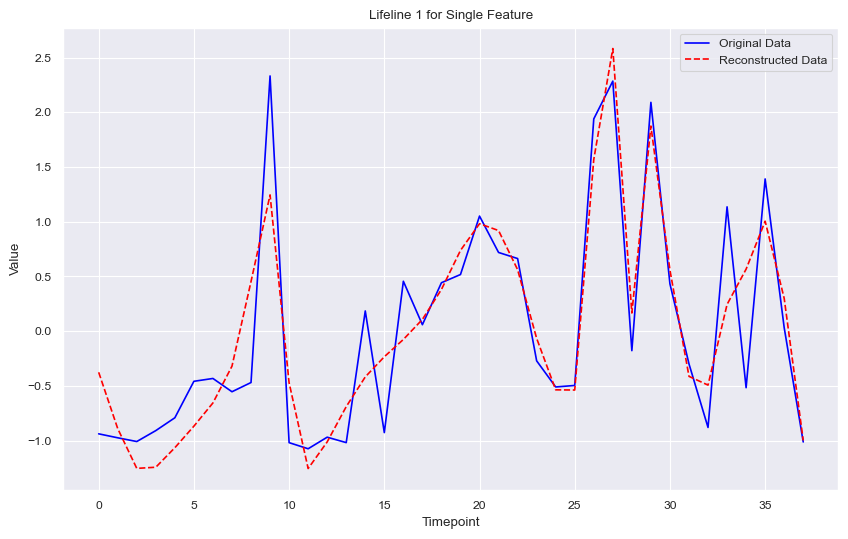

In [15]:
import matplotlib.pyplot as plt

# Assuming that one_lifeline is your data reshaped correctly for the model input
# Example: one_lifeline = np.random.rand(1, 376, 1)  # Use your actual reshaped data here

# Predict the reconstruction for the lifeline
reconstructed = autoencoder.predict(train_data)
lifeline = 5
feature = 6 

# Flatten the arrays to be able to plot them since they contain a single feature
scaled_series = train_data[lifeline,:,feature]
reconstructed_series = reconstructed[lifeline,:,feature]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(scaled_series, label='Original Data', color='blue')
plt.plot(reconstructed_series, label='Reconstructed Data', color='red', linestyle='--')
plt.title('Lifeline 1 for Single Feature')
plt.xlabel('Timepoint')
plt.ylabel('Value')
plt.legend()
plt.show()


In [16]:
from tensorflow.keras.models import Model

# Assuming 'encoded' is the output of your last encoder layer and 'inputs' is your input layer
latent_model = Model(inputs, latent_space)
latent_representations = latent_model.predict(train_data)


1/1 [==============================] - 1s 921ms/step


In [18]:
import pandas as pd

# Convert the latent representations to a DataFrame
latent_df = pd.DataFrame(latent_representations)

# Specify your desired Excel file path
excel_file_path = 'D:/Desktop/Work/Multiple Lifelines/latent_representations_14_lifelines.csv'

# Save the DataFrame to an Excel file
latent_df.to_csv(excel_file_path, index=False)

print(f"Latent representations saved to {excel_file_path}")


Latent representations saved to D:/Desktop/Work/Multiple Lifelines/latent_representations_14_lifelines.csv


In [25]:
import optuna
from tensorflow.keras.layers import Input, LSTM, RepeatVector, Dense, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.initializers import glorot_uniform, he_normal
from sklearn.model_selection import train_test_split

# Assuming 'normalized_data' is defined elsewhere in your script
# normalized_data = ...

# Define the objective function to optimize
def objective(trial):
    # Hyperparameter setting
    lstm_units = trial.suggest_categorical('lstm_units', [200, 300, 350, 400])
    lstm_units_layer2 = trial.suggest_categorical('lstm_units_layer2', [200, 250, 275, 300])  # Key name changed
    dense_units = trial.suggest_categorical('dense_units', [50, 100, 150, 200])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64])

    # Split the data
    train_data, val_data = train_test_split(normalized_data, test_size=0.2, random_state=42)

    # Define the input layer with the shape (timesteps, features)
    input_shape = (train_data.shape[1], train_data.shape[2])
    inputs = Input(shape=input_shape)

    # Encoder layers with glorot_uniform initializer
    encoded = LSTM(lstm_units, activation='tanh', return_sequences=True,
                   kernel_initializer=glorot_uniform(seed=0))(inputs)
    encoded = LSTM(lstm_units_layer2, activation='tanh', return_sequences=False,
                   kernel_initializer=glorot_uniform(seed=0))(encoded)

    # Latent space with he_normal initializer
    latent_space = Dense(dense_units, activation='tanh',
                         kernel_initializer=he_normal(seed=0))(encoded)

    # Decoder layers, repeat the latent space at each timestep
    decoded = RepeatVector(input_shape[0])(latent_space)
    decoded = LSTM(lstm_units_layer2, activation='tanh', return_sequences=True,
                   kernel_initializer=glorot_uniform(seed=0))(decoded)
    decoded = LSTM(lstm_units, activation='tanh', return_sequences=True,
                   kernel_initializer=glorot_uniform(seed=0))(decoded)

    # Output layer, reconstruct the original input
    outputs = TimeDistributed(Dense(input_shape[1]))(decoded)

    # Create the autoencoder model
    autoencoder = Model(inputs, outputs)
    autoencoder.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')

    # Early stopping and learning rate reduction
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

    # Model training
    history = autoencoder.fit(train_data, train_data, epochs=700, batch_size=batch_size,
                              validation_data=(val_data, val_data), callbacks=[early_stop, reduce_lr], verbose=0)

    # Retrieve the best score
    best_score = min(history.history['val_loss'])
    return best_score

# Create a study object and specify the direction is 'minimize'.
study = optuna.create_study(direction='minimize')

# Optimize the study, the objective function is passed in as the first argument.
study.optimize(objective, n_trials=10)  # You can change n_trials to the number of iterations you want to perform

# Print the result
print(study.best_params)


[I 2024-02-21 13:53:44,135] A new study created in memory with name: no-name-9527dc86-4666-4c77-bade-617d26e31c4c
C:\Users\elysi\AppData\Local\Temp\ipykernel_18092\577897805.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
[I 2024-02-21 13:53:58,746] Trial 0 finished with value: 0.9940025210380554 and parameters: {'lstm_units': 200, 'lstm_units_layer2': 275, 'dense_units': 200, 'learning_rate': 4.57064882981988e-05, 'batch_size': 32}. Best is trial 0 with value: 0.9940025210380554.
[I 2024-02-21 13:54:25,044] Trial 1 finished with value: 0.807985782623291 and parameters: {'lstm_units': 400, 'lstm_units_layer2': 250, 'dense_units': 100, 'learning_rate': 0.00021939476012720676, 'batch_size': 64}. Best is trial 1 with value: 0.807985782623291.
[I 2024-02-21 

{'lstm_units': 400, 'lstm_units_layer2': 300, 'dense_units': 100, 'learning_rate': 0.00040225479094866155, 'batch_size': 16}


In [45]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, RepeatVector, Dense, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Optimized hyperparameters
lstm_units = study.best_params['lstm_units'] # Optimized LSTM units for both encoder and decoder
lstm_units_layer2 = study.best_params['lstm_units_layer2']
dense_units = study.best_params['dense_units'] # Optimized Dense units for latent representation
learning_rate = study.best_params['learning_rate']  # Optimized learning rate
batch_size = study.best_params['batch_size']  # Optimized batch size

# Split the data
train_data, val_data = train_test_split(normalized_data, test_size=0.2, random_state=42)

# Define the input layer with the shape (timesteps, features)
input_shape = (train_data.shape[1], train_data.shape[2])
inputs = Input(shape=input_shape)

# Encoder layers with glorot_uniform initializer
encoded = LSTM(lstm_units, activation='tanh', return_sequences=True,
                   kernel_initializer=glorot_uniform(seed=0))(inputs)
encoded = LSTM(lstm_units_layer2, activation='tanh', return_sequences=False,
                   kernel_initializer=glorot_uniform(seed=0))(encoded)

# Latent space with he_normal initializer
latent_space = Dense(dense_units, activation='tanh',
                         kernel_initializer=he_normal(seed=0))(encoded)

# Decoder layers, repeat the latent space at each timestep
decoded = RepeatVector(input_shape[0])(latent_space)
decoded = LSTM(lstm_units_layer2, activation='tanh', return_sequences=True,
                   kernel_initializer=glorot_uniform(seed=0))(decoded)
decoded = LSTM(lstm_units, activation='tanh', return_sequences=True,
                   kernel_initializer=glorot_uniform(seed=0))(decoded)

# Output layer, reconstruct the original input
outputs = TimeDistributed(Dense(input_shape[1]))(decoded)

# Create the autoencoder model
autoencoder = Model(inputs, outputs)
autoencoder.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')

# Callbacks for training
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = autoencoder.fit(train_data, train_data, epochs=400, batch_size=batch_size,
                              validation_data=(val_data, val_data), callbacks=[early_stop, reduce_lr], verbose=0)
# Predict on the validation set
val_predictions = autoencoder.predict(val_data)

# Compute mean squared error on the validation set
mean_squared_error = np.mean(np.square(val_data - val_predictions))

# Compute root mean squared error (RMSE)
reconstruction_loss = np.sqrt(mean_squared_error)
print(f"Validation RMSE: {reconstruction_loss}")


1/1 [==============================] - 1s 1s/step
Validation RMSE: 0.8765563444114308


1/1 [==============================] - 0s 125ms/step


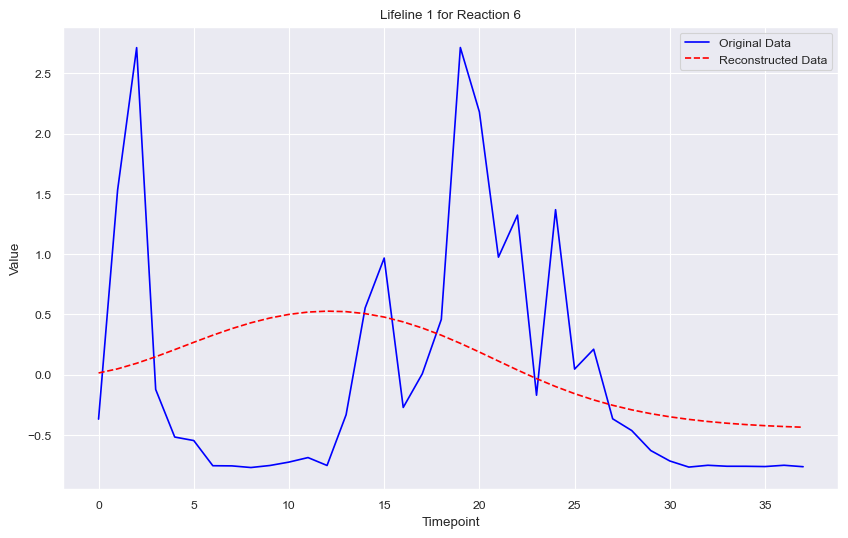

In [30]:
import matplotlib.pyplot as plt

# Choose a specific lifeline and reaction for plotting
lifeline_index = 12  # Index for lifeline 0 
reaction_index = 6 # Reaction index, biomass reaction

# Predict the reconstruction for the lifeline
reconstructed = autoencoder.predict(normalized_data)

# Extract series for plotting
scaled_series = normalized_data[lifeline_index, :, reaction_index]
reconstructed_series = reconstructed[lifeline_index, :, reaction_index]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(scaled_series, label='Original Data', color='blue')
plt.plot(reconstructed_series, label='Reconstructed Data', color='red', linestyle='--')
plt.title(f'Lifeline 1 for Reaction {reaction_index}')
plt.xlabel('Timepoint')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import Model

# Assuming 'encoded' is the output of your last encoder layer and 'inputs' is your input layer
latent_model = Model(inputs, latent_space)
latent_representations = latent_model.predict(train_data)


In [ ]:
import pandas as pd

# Convert the latent representations to a DataFrame
latent_df = pd.DataFrame(latent_representations)

# Specify your desired Excel file path
excel_file_path = '/mnt/data/latent_representations_tuned.xlsx'

# Save the DataFrame to an Excel file
latent_df.to_excel(excel_file_path, index=False)

print(f"Latent representations saved to {excel_file_path}")


# Training 100 Lifelines

In [20]:
import os
import pandas as pd
import numpy as np

folder_path = '100_dFBA_Lifelines'
file_names = sorted(os.listdir(folder_path))

expected_timepoints = 376 # reduced timepoints by 10 for faster runs, just temporary 

for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    lifeline_df = pd.read_csv(file_path, sep="\t", index_col=0)

    # Select every 10th row and ensure there are exactly 376 timepoints
    reduced_df = lifeline_df.iloc[::10][:expected_timepoints]
    reduced_df.to_csv(file_path, sep="\t")

data_list = []
filtered_reactions = None

for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    lifeline_df = pd.read_csv(file_path, sep="\t", index_col=0)

    if filtered_reactions is None:
        non_constant_fluxes_df = lifeline_df.loc[:, (lifeline_df != lifeline_df.iloc[0]).any()]
        unique_reactions_fluxes_df = non_constant_fluxes_df.loc[:, ~non_constant_fluxes_df.columns.duplicated()]
        filtered_reactions = unique_reactions_fluxes_df.columns

    filtered_lifeline_df = lifeline_df[filtered_reactions]

    if filtered_lifeline_df.shape != (expected_timepoints, len(filtered_reactions)):
        print(f"Shape mismatch for file: {file_name}. Expected ({expected_timepoints}, {len(filtered_reactions)}) but got {filtered_lifeline_df.shape}")

    data_list.append(filtered_lifeline_df.to_numpy())

data_3d = np.stack(data_list, axis=1)
print("Shape of the Big Matrix:", data_3d.shape)


C:\Users\elysi\AppData\Local\Temp\ipykernel_27696\597854438.py:15: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  reduced_df = lifeline_df.iloc[::10][:expected_timepoints]
C:\Users\elysi\AppData\Local\Temp\ipykernel_27696\597854438.py:15: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  reduced_df = lifeline_df.iloc[::10][:expected_timepoints]
C:\Users\elysi\AppData\Local\Temp\ipykernel_27696\597854438.py:15: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  reduced_df = lifeline_df.iloc[::10][:expected_t

Shape mismatch for file: lifeline_0_dFBA_pd_df.csv. Expected (376, 48) but got (38, 48)
Shape mismatch for file: lifeline_100_dFBA_pd_df.csv. Expected (376, 48) but got (38, 48)
Shape mismatch for file: lifeline_10_dFBA_pd_df.csv. Expected (376, 48) but got (38, 48)
Shape mismatch for file: lifeline_11_dFBA_pd_df.csv. Expected (376, 48) but got (38, 48)
Shape mismatch for file: lifeline_12_dFBA_pd_df.csv. Expected (376, 48) but got (38, 48)
Shape mismatch for file: lifeline_13_dFBA_pd_df.csv. Expected (376, 48) but got (38, 48)
Shape mismatch for file: lifeline_14_dFBA_pd_df.csv. Expected (376, 48) but got (38, 48)
Shape mismatch for file: lifeline_15_dFBA_pd_df.csv. Expected (376, 48) but got (38, 48)
Shape mismatch for file: lifeline_16_dFBA_pd_df.csv. Expected (376, 48) but got (38, 48)
Shape mismatch for file: lifeline_17_dFBA_pd_df.csv. Expected (376, 48) but got (38, 48)
Shape mismatch for file: lifeline_18_dFBA_pd_df.csv. Expected (376, 48) but got (38, 48)
Shape mismatch for fi

In [21]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming data_3d is original data with shape (n_timesteps, n_samples, n_features)
# Example: n_timesteps = 376, n_samples = 14, n_features = 48

n_timesteps, n_samples, n_features = data_3d.shape

# Initialize a StandardScaler for each feature for each sample
scalers = [[StandardScaler() for _ in range(n_features)] for _ in range(n_samples)]

# Normalized data will have the same shape as data_3d initially
normalized_data = np.empty_like(data_3d, dtype=float)

# Apply the scalers to each feature for each sample across all timesteps
for sample_index in range(n_samples):
    for feature_index in range(n_features):
        # Extract the feature data for the current sample
        feature_data = data_3d[:, sample_index, feature_index].reshape(-1, 1)
        
        # Fit and transform the data using the corresponding scaler
        normalized_feature_data = scalers[sample_index][feature_index].fit_transform(feature_data)
        
        # Assign the normalized data back to its position in the normalized_data array
        normalized_data[:, sample_index, feature_index] = normalized_feature_data.flatten()

# Transpose normalized_data to have the shape (n_samples, n_timesteps, n_features)
normalized_data = np.transpose(normalized_data, (1, 0, 2))

In [29]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, RepeatVector, TimeDistributed
from tensorflow.keras.initializers import glorot_uniform, he_normal
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Assuming five_lifeline is a 3D array with the shape (1, 376, 48)
train_data = normalized_data
val_data = train_data  # Using the same data for validation as a placeholder

# Define the input layer with the shape (timesteps, features)
input_shape = (train_data.shape[1], train_data.shape[2])
inputs = Input(shape=input_shape)

# Encoder layers with glorot_uniform initializer
encoded = LSTM(600, activation='tanh', return_sequences=True,
               kernel_initializer=glorot_uniform(seed=0))(inputs)
encoded = LSTM(500, activation='tanh', return_sequences=True,
               kernel_initializer=glorot_uniform(seed=0))(encoded)
encoded = LSTM(450, activation='tanh', return_sequences=False,
               kernel_initializer=glorot_uniform(seed=0))(encoded)
# Latent space with he_normal initializer
latent_space = Dense(100, activation='tanh',
                     kernel_initializer=he_normal(seed=0))(encoded)

# Decoder layers, repeat the latent space at each timestep
decoded = RepeatVector(input_shape[0])(latent_space)
decoded = LSTM(450, activation='tanh', return_sequences=True,
               kernel_initializer=glorot_uniform(seed=0))(decoded)
decoded = LSTM(500, activation='tanh', return_sequences=True,
               kernel_initializer=glorot_uniform(seed=0))(decoded)
decoded = LSTM(600, activation='tanh', return_sequences=True,
               kernel_initializer=glorot_uniform(seed=0))(decoded)

# Output layer, reconstruct the original input
outputs = TimeDistributed(Dense(input_shape[1]))(decoded)

# Create the autoencoder model
autoencoder = Model(inputs, outputs)
autoencoder.compile(optimizer='adam', loss='mse')

# Summary of the model
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 38, 48)]          0         
                                                                 
 lstm_24 (LSTM)              (None, 38, 600)           1557600   
                                                                 
 lstm_25 (LSTM)              (None, 38, 500)           2202000   
                                                                 
 lstm_26 (LSTM)              (None, 450)               1711800   
                                                                 
 dense_8 (Dense)             (None, 100)               45100     
                                                                 
 repeat_vector_4 (RepeatVec  (None, 38, 100)           0         
 tor)                                                            
                                                           

In [30]:
# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20, min_lr=0.00001)
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Fit the model
history = autoencoder.fit(
    train_data,
    train_data,
    epochs = 500,
    batch_size=32,  # Adjust the batch size if necessary
    validation_data=(val_data, val_data),
    callbacks=[reduce_lr, early_stop]
)

# Predict on the validation set
val_predictions = autoencoder.predict(val_data)

# Compute mean squared error on the validation set
mean_squared_error = np.mean(np.square(val_data - val_predictions))

# Compute root mean squared error (RMSE)
reconstruction_loss = np.sqrt(mean_squared_error)
print(f"Validation RMSE: {reconstruction_loss}")


Epoch 1/500
4/4 [==============================] - 27s 5s/step - loss: 1.0911 - val_loss: 0.9897 - lr: 0.0010
Epoch 2/500
4/4 [==============================] - 14s 4s/step - loss: 0.9860 - val_loss: 0.9639 - lr: 0.0010
Epoch 3/500
4/4 [==============================] - 14s 4s/step - loss: 0.9559 - val_loss: 0.9308 - lr: 0.0010
Epoch 4/500
4/4 [==============================] - 14s 4s/step - loss: 0.9765 - val_loss: 0.9633 - lr: 0.0010
Epoch 5/500
4/4 [==============================] - 14s 4s/step - loss: 0.9444 - val_loss: 0.9380 - lr: 0.0010
Epoch 6/500
4/4 [==============================] - 16s 4s/step - loss: 0.9285 - val_loss: 0.9048 - lr: 0.0010
Epoch 7/500
4/4 [==============================] - 15s 4s/step - loss: 0.8964 - val_loss: 0.8887 - lr: 0.0010
Epoch 8/500
4/4 [==============================] - 15s 4s/step - loss: 0.8920 - val_loss: 0.8622 - lr: 0.0010
Epoch 9/500
4/4 [==============================] - 13s 4s/step - loss: 0.8532 - val_loss: 0.8293 - lr: 0.0010
Epoch 10/5

In [31]:
import matplotlib.pyplot as plt

# Assuming that one_lifeline is your data reshaped correctly for the model input
# Example: one_lifeline = np.random.rand(1, 376, 1)  # Use your actual reshaped data here

# Predict the reconstruction for the lifeline
reconstructed = autoencoder.predict(train_data)
lifeline = 5
feature = 6 

# Flatten the arrays to be able to plot them since they contain a single feature
scaled_series = train_data[lifeline,:,feature]
reconstructed_series = reconstructed[lifeline,:,feature]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(scaled_series, label='Original Data', color='blue')
plt.plot(reconstructed_series, label='Reconstructed Data', color='red', linestyle='--')
plt.title('Lifeline 1 for Single Feature')
plt.xlabel('Timepoint')
plt.ylabel('Value')
plt.legend()
plt.show()


4/4 [==============================] - 5s 1s/step


In [32]:
from tensorflow.keras.models import Model

# Assuming 'encoded' is the output of your last encoder layer and 'inputs' is your input layer
latent_model = Model(inputs, latent_space)
latent_representations = latent_model.predict(train_data)


4/4 [==============================] - 3s 538ms/step


In [33]:
import pandas as pd

# Convert the latent representations to a DataFrame
latent_df = pd.DataFrame(latent_representations)

# Specify your desired Excel file path
excel_file_path = 'D:/Desktop/Work/Multiple Lifelines/latent_representations_100_lifelines.csv'

# Save the DataFrame to an Excel file
latent_df.to_csv(excel_file_path, index=False)

print(f"Latent representations saved to {excel_file_path}")


Latent representations saved to D:/Desktop/Work/Multiple Lifelines/latent_representations_100_lifelines.csv


# Only used biomass reaction

In [39]:
import os
import pandas as pd
import numpy as np

folder_path = '100_dFBA_Lifelines'
file_names = sorted(os.listdir(folder_path))

expected_timepoints = 376 # reduced timepoints by 10 for faster runs, just temporary 

for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    lifeline_df = pd.read_csv(file_path, sep="\t", index_col=0)

    # Select every 10th row and ensure there are exactly 376 timepoints
    reduced_df = lifeline_df.iloc[::10][:expected_timepoints]
    reduced_df.to_csv(file_path, sep="\t")

data_list = []
filtered_reactions = None

for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    lifeline_df = pd.read_csv(file_path, sep="\t", index_col=0)

    if filtered_reactions is None:
        non_constant_fluxes_df = lifeline_df.loc[:, (lifeline_df != lifeline_df.iloc[0]).any()]
        unique_reactions_fluxes_df = non_constant_fluxes_df.loc[:, ~non_constant_fluxes_df.columns.duplicated()]
        filtered_reactions = unique_reactions_fluxes_df.columns

    filtered_lifeline_df = lifeline_df[filtered_reactions]

    if filtered_lifeline_df.shape != (expected_timepoints, len(filtered_reactions)):
        print(f"Shape mismatch for file: {file_name}. Expected ({expected_timepoints}, {len(filtered_reactions)}) but got {filtered_lifeline_df.shape}")

    data_list.append(filtered_lifeline_df.to_numpy())

data_3d = np.stack(data_list, axis=1)
print("Shape of the Big Matrix:", data_3d.shape)


C:\Users\elysi\AppData\Local\Temp\ipykernel_27696\597854438.py:15: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  reduced_df = lifeline_df.iloc[::10][:expected_timepoints]
C:\Users\elysi\AppData\Local\Temp\ipykernel_27696\597854438.py:15: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  reduced_df = lifeline_df.iloc[::10][:expected_timepoints]
C:\Users\elysi\AppData\Local\Temp\ipykernel_27696\597854438.py:15: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  reduced_df = lifeline_df.iloc[::10][:expected_t

Shape mismatch for file: lifeline_0_dFBA_pd_df.csv. Expected (376, 48) but got (38, 48)
Shape mismatch for file: lifeline_100_dFBA_pd_df.csv. Expected (376, 48) but got (38, 48)
Shape mismatch for file: lifeline_10_dFBA_pd_df.csv. Expected (376, 48) but got (38, 48)
Shape mismatch for file: lifeline_11_dFBA_pd_df.csv. Expected (376, 48) but got (38, 48)
Shape mismatch for file: lifeline_12_dFBA_pd_df.csv. Expected (376, 48) but got (38, 48)
Shape mismatch for file: lifeline_13_dFBA_pd_df.csv. Expected (376, 48) but got (38, 48)
Shape mismatch for file: lifeline_14_dFBA_pd_df.csv. Expected (376, 48) but got (38, 48)
Shape mismatch for file: lifeline_15_dFBA_pd_df.csv. Expected (376, 48) but got (38, 48)
Shape mismatch for file: lifeline_16_dFBA_pd_df.csv. Expected (376, 48) but got (38, 48)
Shape mismatch for file: lifeline_17_dFBA_pd_df.csv. Expected (376, 48) but got (38, 48)
Shape mismatch for file: lifeline_18_dFBA_pd_df.csv. Expected (376, 48) but got (38, 48)
Shape mismatch for fi

In [40]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming data_3d is original data with shape (n_timesteps, n_samples, n_features)
# Example: n_timesteps = 376, n_samples = 14, n_features = 48

n_timesteps, n_samples, n_features = data_3d.shape

# Initialize a StandardScaler for each feature for each sample
scalers = [[StandardScaler() for _ in range(n_features)] for _ in range(n_samples)]

# Normalized data will have the same shape as data_3d initially
normalized_data = np.empty_like(data_3d, dtype=float)

# Apply the scalers to each feature for each sample across all timesteps
for sample_index in range(n_samples):
    for feature_index in range(n_features):
        # Extract the feature data for the current sample
        feature_data = data_3d[:, sample_index, feature_index].reshape(-1, 1)
        
        # Fit and transform the data using the corresponding scaler
        normalized_feature_data = scalers[sample_index][feature_index].fit_transform(feature_data)
        
        # Assign the normalized data back to its position in the normalized_data array
        normalized_data[:, sample_index, feature_index] = normalized_feature_data.flatten()

# Transpose normalized_data to have the shape (n_samples, n_timesteps, n_features)
normalized_data = np.transpose(normalized_data, (1, 0, 2))

In [45]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, RepeatVector, TimeDistributed
from tensorflow.keras.initializers import glorot_uniform, he_normal
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Assuming five_lifeline is a 3D array with the shape (1, 376, 48)
train_data = normalized_data
val_data = train_data  # Using the same data for validation as a placeholder

# Define the input layer with the shape (timesteps, features)
input_shape = (train_data.shape[1], train_data.shape[2])
inputs = Input(shape=input_shape)

# Encoder layers with glorot_uniform initializer
encoded = LSTM(400, activation='tanh', return_sequences=True,
               kernel_initializer=glorot_uniform(seed=0))(inputs)
encoded = LSTM(300, activation='tanh', return_sequences=True,
               kernel_initializer=glorot_uniform(seed=0))(encoded)
encoded = LSTM(200, activation='tanh', return_sequences=False,
               kernel_initializer=glorot_uniform(seed=0))(encoded)
# Latent space with he_normal initializer
latent_space = Dense(100, activation='tanh',
                     kernel_initializer=he_normal(seed=0))(encoded)

# Decoder layers, repeat the latent space at each timestep
decoded = RepeatVector(input_shape[0])(latent_space)
decoded = LSTM(200, activation='tanh', return_sequences=True,
               kernel_initializer=glorot_uniform(seed=0))(decoded)
decoded = LSTM(300, activation='tanh', return_sequences=True,
               kernel_initializer=glorot_uniform(seed=0))(decoded)
decoded = LSTM(400, activation='tanh', return_sequences=True,
               kernel_initializer=glorot_uniform(seed=0))(decoded)

# Output layer, reconstruct the original input
outputs = TimeDistributed(Dense(input_shape[1]))(decoded)

# Create the autoencoder model
autoencoder = Model(inputs, outputs)
autoencoder.compile(optimizer='adam', loss='mse')

# Summary of the model
autoencoder.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 38, 1)]           0         
                                                                 
 lstm_30 (LSTM)              (None, 38, 400)           643200    
                                                                 
 lstm_31 (LSTM)              (None, 38, 300)           841200    
                                                                 
 lstm_32 (LSTM)              (None, 200)               400800    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 repeat_vector_5 (RepeatVec  (None, 38, 100)           0         
 tor)                                                            
                                                           

In [46]:
# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20, min_lr=0.00001)
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Fit the model
history = autoencoder.fit(
    train_data,
    train_data,
    epochs = 500,
    batch_size=32,  # Adjust the batch size if necessary
    validation_data=(val_data, val_data),
    callbacks=[reduce_lr, early_stop]
)

# Predict on the validation set
val_predictions = autoencoder.predict(val_data)

# Compute mean squared error on the validation set
mean_squared_error = np.mean(np.square(val_data - val_predictions))

# Compute root mean squared error (RMSE)
reconstruction_loss = np.sqrt(mean_squared_error)
print(f"Validation RMSE: {reconstruction_loss}")


Epoch 1/500
4/4 [==============================] - 23s 4s/step - loss: 1.2687 - val_loss: 0.9953 - lr: 0.0010
Epoch 2/500
4/4 [==============================] - 12s 3s/step - loss: 0.9991 - val_loss: 0.9954 - lr: 0.0010
Epoch 3/500
4/4 [==============================] - 11s 3s/step - loss: 0.9908 - val_loss: 0.9740 - lr: 0.0010
Epoch 4/500
4/4 [==============================] - 11s 3s/step - loss: 0.9704 - val_loss: 0.9601 - lr: 0.0010
Epoch 5/500
4/4 [==============================] - 11s 3s/step - loss: 0.9608 - val_loss: 0.9573 - lr: 0.0010
Epoch 6/500
4/4 [==============================] - 11s 3s/step - loss: 0.9493 - val_loss: 0.9355 - lr: 0.0010
Epoch 7/500
4/4 [==============================] - 10s 3s/step - loss: 0.9302 - val_loss: 0.9250 - lr: 0.0010
Epoch 8/500
4/4 [==============================] - 11s 3s/step - loss: 0.9160 - val_loss: 0.8943 - lr: 0.0010
Epoch 9/500
4/4 [==============================] - 11s 3s/step - loss: 0.8892 - val_loss: 0.8696 - lr: 0.0010
Epoch 10/5

4/4 [==============================] - 2s 418ms/step


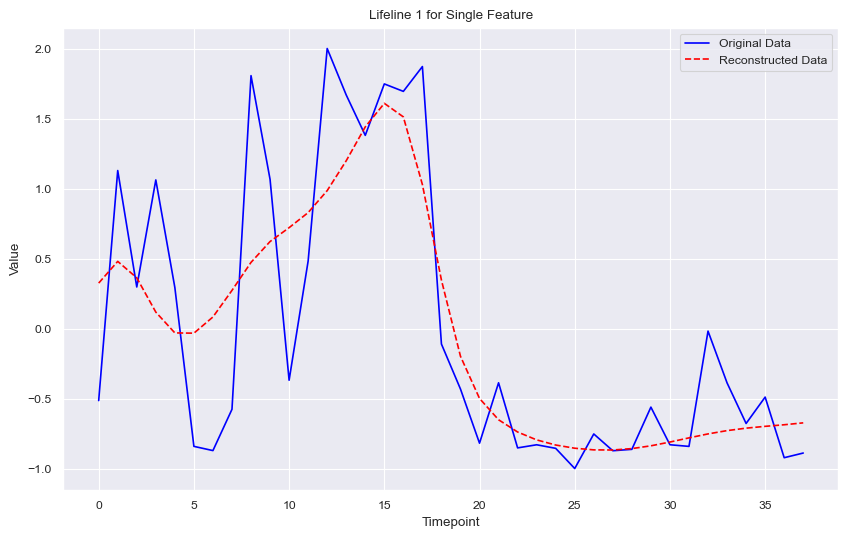

In [48]:
import matplotlib.pyplot as plt

# Assuming that one_lifeline is your data reshaped correctly for the model input
# Example: one_lifeline = np.random.rand(1, 376, 1)  # Use your actual reshaped data here

# Predict the reconstruction for the lifeline
reconstructed = autoencoder.predict(train_data)
lifeline = 5
feature = 0 

# Flatten the arrays to be able to plot them since they contain a single feature
scaled_series = train_data[lifeline,:,feature]
reconstructed_series = reconstructed[lifeline,:,feature]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(scaled_series, label='Original Data', color='blue')
plt.plot(reconstructed_series, label='Reconstructed Data', color='red', linestyle='--')
plt.title('Lifeline 1 for Single Feature')
plt.xlabel('Timepoint')
plt.ylabel('Value')
plt.legend()
plt.show()


In [49]:
from tensorflow.keras.models import Model

# Assuming 'encoded' is the output of your last encoder layer and 'inputs' is your input layer
latent_model = Model(inputs, latent_space)
latent_representations = latent_model.predict(train_data)


4/4 [==============================] - 2s 287ms/step


In [50]:
import pandas as pd

# Convert the latent representations to a DataFrame
latent_df = pd.DataFrame(latent_representations)

# Specify your desired Excel file path
excel_file_path = 'D:/Desktop/Work/Multiple Lifelines/latent_representations_100_lifelines_just_biomass.csv'

# Save the DataFrame to an Excel file
latent_df.to_csv(excel_file_path, index=False)

print(f"Latent representations saved to {excel_file_path}")


Latent representations saved to D:/Desktop/Work/Multiple Lifelines/latent_representations_100_lifelines_just_biomass.csv


In [52]:
lifelines_to_clusters = pd.read_csv('lifelines_to_clusters.csv')

In [53]:
lifelines_to_clusters

Unnamed: 0  cluster
0            28        1
1            80        2
2            22        2
3             9        3
4             5        4
..          ...      ...
96           61        1
97           59        1
98           83        1
99          101        2
100          30        4

[101 rows x 2 columns]

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file with lifeline-cluster pairs
lifelines_to_clusters = pd.read_csv('lifelines_to_clusters.csv')
lifelines_to_clusters.columns = ['lifeline', 'cluster']

# Determine the number of clusters
num_clusters = lifelines_to_clusters['cluster'].nunique()

# Setup the figure and axes for a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Create a plot for each cluster on its own subplot
for cluster_id in range(1, num_clusters + 1):
    # Find all lifelines belonging to the current cluster
    lifelines_in_cluster = lifelines_to_clusters[lifelines_to_clusters['cluster'] == cluster_id]['lifeline']
    
    # Get the corresponding subplot axis
    ax = axes[cluster_id - 1]
    
    # Plot each lifeline in the cluster
    for lifeline in lifelines_in_cluster:
        # Adjust lifeline index for zero-based indexing
        adjusted_lifeline_index = lifeline - 1
        
        # Extract the lifeline data from train_data
        # Replace 'feature' with the correct index for your feature
        lifeline_data = train_data[adjusted_lifeline_index, :, feature]  
        ax.plot(lifeline_data, label=f'Lifeline {lifeline}')
    
    # Set titles and labels for each subplot
    ax.set_title(f'Cluster {cluster_id}')
    ax.set_xlabel('Time or Sequence')
    ax.set_ylabel('Feature Value')
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# Latent Space for Each Timestep

In [1]:
import os
import pandas as pd
import numpy as np

folder_path = '100_dFBA_Lifelines'
file_names = sorted(os.listdir(folder_path))

expected_timepoints = 376 # reduced timepoints by 10 for faster runs, just temporary 

for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    lifeline_df = pd.read_csv(file_path, sep="\t", index_col=0)

    # Select every 10th row and ensure there are exactly 376 timepoints
    reduced_df = lifeline_df.iloc[::10][:expected_timepoints]
    reduced_df.to_csv(file_path, sep="\t")

data_list = []
filtered_reactions = None

for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    lifeline_df = pd.read_csv(file_path, sep="\t", index_col=0)

    if filtered_reactions is None:
        non_constant_fluxes_df = lifeline_df.loc[:, (lifeline_df != lifeline_df.iloc[0]).any()]
        unique_reactions_fluxes_df = non_constant_fluxes_df.loc[:, ~non_constant_fluxes_df.columns.duplicated()]
        filtered_reactions = unique_reactions_fluxes_df.columns

    filtered_lifeline_df = lifeline_df[filtered_reactions]

    if filtered_lifeline_df.shape != (expected_timepoints, len(filtered_reactions)):
        print(f"Shape mismatch for file: {file_name}. Expected ({expected_timepoints}, {len(filtered_reactions)}) but got {filtered_lifeline_df.shape}")

    data_list.append(filtered_lifeline_df.to_numpy())

data_3d = np.stack(data_list, axis=1)
print("Shape of the Big Matrix:", data_3d.shape)


C:\Users\elysi\AppData\Local\Temp\ipykernel_29100\597854438.py:15: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  reduced_df = lifeline_df.iloc[::10][:expected_timepoints]
C:\Users\elysi\AppData\Local\Temp\ipykernel_29100\597854438.py:15: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  reduced_df = lifeline_df.iloc[::10][:expected_timepoints]
C:\Users\elysi\AppData\Local\Temp\ipykernel_29100\597854438.py:15: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  reduced_df = lifeline_df.iloc[::10][:expected_t

Shape of the Big Matrix: (376, 101, 48)


In [2]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming data_3d is original data with shape (n_timesteps, n_samples, n_features)
# Example: n_timesteps = 376, n_samples = 14, n_features = 48

n_timesteps, n_samples, n_features = data_3d.shape

# Initialize a StandardScaler for each feature for each sample
scalers = [[StandardScaler() for _ in range(n_features)] for _ in range(n_samples)]

# Normalized data will have the same shape as data_3d initially
normalized_data = np.empty_like(data_3d, dtype=float)

# Apply the scalers to each feature for each sample across all timesteps
for sample_index in range(n_samples):
    for feature_index in range(n_features):
        # Extract the feature data for the current sample
        feature_data = data_3d[:, sample_index, feature_index].reshape(-1, 1)
        
        # Fit and transform the data using the corresponding scaler
        normalized_feature_data = scalers[sample_index][feature_index].fit_transform(feature_data)
        
        # Assign the normalized data back to its position in the normalized_data array
        normalized_data[:, sample_index, feature_index] = normalized_feature_data.flatten()

# Transpose normalized_data to have the shape (n_samples, n_timesteps, n_features)
normalized_data = np.transpose(normalized_data, (1, 0, 2))

In [3]:
normalized_data.shape

(101, 376, 48)

In [4]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed
from tensorflow.keras.initializers import glorot_uniform, he_normal
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Assuming train_data is a 3D array with the shape (1, 376, 48)
train_data = normalized_data
val_data = train_data  # Using the same data for validation as a placeholder

# Define the input layer with the shape (timesteps, features)
input_shape = (train_data.shape[1], train_data.shape[2])
inputs = Input(shape=input_shape)

# Encoder layers with glorot_uniform initializer
encoded = LSTM(400, activation='tanh', return_sequences=True,
               kernel_initializer=glorot_uniform(seed=0))(inputs)
encoded = LSTM(200, activation='tanh', return_sequences=True,
               kernel_initializer=glorot_uniform(seed=0))(encoded)
# This LSTM layer now returns sequences, providing a latent vector for each timestep
encoded = LSTM(10, activation='tanh', return_sequences=True,
               kernel_initializer=glorot_uniform(seed=0))(encoded)

# Decoder layers
# No need for RepeatVector since we're returning sequences in the encoder
decoded = LSTM(10, activation='tanh', return_sequences=True,
               kernel_initializer=glorot_uniform(seed=0))(encoded)
decoded = LSTM(200, activation='tanh', return_sequences=True,
               kernel_initializer=glorot_uniform(seed=0))(decoded)
decoded = LSTM(400, activation='tanh', return_sequences=True,
               kernel_initializer=glorot_uniform(seed=0))(decoded)

# Output layer, reconstruct the original input at each timestep
outputs = TimeDistributed(Dense(input_shape[1]))(decoded)

# Create the autoencoder model
autoencoder = Model(inputs, outputs)
autoencoder.compile(optimizer='adam', loss='mse')

# Summary of the model
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 376, 48)]         0         
                                                                 
 lstm (LSTM)                 (None, 376, 400)          718400    
                                                                 
 lstm_1 (LSTM)               (None, 376, 200)          480800    
                                                                 
 lstm_2 (LSTM)               (None, 376, 10)           8440      
                                                                 
 lstm_3 (LSTM)               (None, 376, 10)           840       
                                                                 
 lstm_4 (LSTM)               (None, 376, 200)          168800    
                                                                 
 lstm_5 (LSTM)               (None, 376, 400)          961600

In [5]:
# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20, min_lr=0.00001)
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Fit the model
history = autoencoder.fit(
    train_data,
    train_data,
    epochs = 100,
    batch_size=32,  # Adjust the batch size if necessary
    validation_data=(val_data, val_data),
    callbacks=[reduce_lr, early_stop]
)

# Predict on the validation set
val_predictions = autoencoder.predict(val_data)

# Compute mean squared error on the validation set
mean_squared_error = np.mean(np.square(val_data - val_predictions))

# Compute root mean squared error (RMSE)
reconstruction_loss = np.sqrt(mean_squared_error)
print(f"Validation RMSE: {reconstruction_loss}")


Epoch 1/100
4/4 [==============================] - 44s 9s/step - loss: 0.9653 - val_loss: 0.8598 - lr: 0.0010
Epoch 2/100
4/4 [==============================] - 35s 9s/step - loss: 0.8182 - val_loss: 0.7891 - lr: 0.0010
Epoch 3/100
4/4 [==============================] - 34s 8s/step - loss: 0.7401 - val_loss: 0.6496 - lr: 0.0010
Epoch 4/100
4/4 [==============================] - 34s 9s/step - loss: 0.6186 - val_loss: 0.5855 - lr: 0.0010
Epoch 5/100
4/4 [==============================] - 36s 9s/step - loss: 0.5525 - val_loss: 0.5094 - lr: 0.0010
Epoch 6/100
4/4 [==============================] - 39s 9s/step - loss: 0.4848 - val_loss: 0.4139 - lr: 0.0010
Epoch 7/100
4/4 [==============================] - 40s 10s/step - loss: 0.3998 - val_loss: 0.3696 - lr: 0.0010
Epoch 8/100
4/4 [==============================] - 40s 10s/step - loss: 0.3459 - val_loss: 0.2934 - lr: 0.0010
Epoch 9/100
4/4 [==============================] - 43s 11s/step - loss: 0.2854 - val_loss: 0.2493 - lr: 0.0010
Epoch 1

In [6]:
import matplotlib.pyplot as plt

# Assuming that one_lifeline is your data reshaped correctly for the model input
# Example: one_lifeline = np.random.rand(1, 376, 1)  # Use your actual reshaped data here

# Predict the reconstruction for the lifeline
reconstructed = autoencoder.predict(train_data)
lifeline = 5
feature = 0 

# Flatten the arrays to be able to plot them since they contain a single feature
scaled_series = train_data[lifeline,:,feature]
reconstructed_series = reconstructed[lifeline,:,feature]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(scaled_series, label='Original Data', color='blue')
plt.plot(reconstructed_series, label='Reconstructed Data', color='red', linestyle='--')
plt.title('Lifeline 1 for Single Feature')
plt.xlabel('Timepoint')
plt.ylabel('Value')
plt.legend()
plt.show()


4/4 [==============================] - 11s 3s/step


In [ ]:
# Create a model that includes the input and the output of the last LSTM layer you consider as the latent space
latent_model = Model(inputs=inputs, outputs=encoded)

# Checking the model summary to ensure it's capturing the correct layer
latent_model.summary()

latent_space_representations = latent_model.predict(train_data)

# latent_space_representations now contains the latent vectors for each timestep
# Calculate the average latent vector across timesteps for each sample
average_latent_vectors = np.mean(latent_space_representations, axis=1)

# Save to CSV using pandas
import pandas as pd

# Convert to DataFrame
df = pd.DataFrame(average_latent_vectors)

# Save DataFrame to CSV
csv_file_path = 'latent_space_representations.csv'
df.to_csv(csv_file_path, index=False)


In [75]:
lifelines_to_clusters_timesteps = pd.read_csv('lifelines_to_clusters_timesteps.csv')

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file with lifeline-cluster pairs
lifelines_to_clusters_timesteps = pd.read_csv('lifelines_to_clusters_timesteps.csv')
lifelines_to_clusters_timesteps.columns = ['lifeline', 'cluster']

# Determine the number of clusters
num_clusters = lifelines_to_clusters_timesteps['cluster'].nunique()

# Setup the figure and axes for a 3x3 grid
fig, axes = plt.subplots(2, 1, figsize=(15, 15))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Create a plot for each cluster on its own subplot
for cluster_id in range(1, num_clusters + 1):
    # Find all lifelines belonging to the current cluster
    lifelines_in_cluster = lifelines_to_clusters_timesteps[lifelines_to_clusters_timesteps['cluster'] == cluster_id]['lifeline']
    
    # Get the corresponding subplot axis
    ax = axes[cluster_id - 1]
    
    # Plot each lifeline in the cluster
    for lifeline in lifelines_in_cluster:
        # Adjust lifeline index for zero-based indexing
        adjusted_lifeline_index = lifeline - 1
        
        # Extract the lifeline data from train_data
        # Replace 'feature' with the correct index for your feature
        lifeline_data = train_data[adjusted_lifeline_index, :, feature]  
        ax.plot(lifeline_data, label=f'Lifeline {lifeline}')
    
    # Set titles and labels for each subplot
    ax.set_title(f'Cluster {cluster_id}')
    ax.set_xlabel('Time or Sequence')
    ax.set_ylabel('Feature Value')
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [88]:
# Get the weights of the first decoder LSTM layer
decoder_lstm1 = autoencoder.layers[-3]  # Assuming the last three LSTM layers are the decoder
kernel_weights_1, recurrent_weights_1, biases_1 = decoder_lstm1.get_weights()

# Get the weights of the second decoder LSTM layer
decoder_lstm2 = autoencoder.layers[-2]
kernel_weights_2, recurrent_weights_2, biases_2 = decoder_lstm2.get_weights()

# Get the weights of the output layer (TimeDistributed(Dense(...)))
# The TimeDistributed layer wraps the Dense layer, so you need to access the layer attribute
output_layer = autoencoder.layers[-1].layer
output_kernel_weights, output_biases = output_layer.get_weights()


# Function to find the highest absolute weights in a Dense layer
def find_highest_weights_dense(weights, top_n=5):
    # Take the absolute value of the weights
    abs_weights = np.abs(weights)
    # Find the indices of the top 'n' weights
    top_indices = np.unravel_index(np.argsort(abs_weights, axis=None)[-top_n:], weights.shape)
    # Get the top 'n' weights
    top_weights = weights[top_indices]
    return top_indices, top_weights

# Find the top 5 weights in the output dense layer
top_indices, top_weights = find_highest_weights_dense(output_kernel_weights, top_n=5)
print("Top 5 weights indices:", top_indices)
print("Top 5 weights:", top_weights)



Top 5 weights indices: (array([  9, 270, 254, 374,   9], dtype=int64), array([25, 37, 38, 37, 37], dtype=int64))
Top 5 weights: [-0.3988532  -0.47970894 -0.5011315   0.52769345  0.6915405 ]


In [40]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed
from tensorflow.keras.initializers import glorot_uniform, he_normal
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Assuming train_data is a 3D array with the shape (1, 376, 48)
train_data = normalized_data
val_data = train_data  # Using the same data for validation as a placeholder

# Define the input layer with the shape (timesteps, features)
input_shape = (train_data.shape[1], train_data.shape[2])
inputs = Input(shape=input_shape)

# Encoder layers with glorot_uniform initializer
encoded = LSTM(150, activation='tanh', return_sequences=True,
               kernel_initializer=glorot_uniform(seed=0))(inputs)
encoded = LSTM(100, activation='tanh', return_sequences=True,
               kernel_initializer=glorot_uniform(seed=0))(encoded)
# This LSTM layer now returns sequences, providing a latent vector for each timestep
encoded = LSTM(10, activation='tanh', return_sequences=True,
               kernel_initializer=glorot_uniform(seed=0))(encoded)

# Decoder layers
# No need for RepeatVector since we're returning sequences in the encoder
decoded = LSTM(10, activation='tanh', return_sequences=True,
               kernel_initializer=glorot_uniform(seed=0))(encoded)
decoded = LSTM(100, activation='tanh', return_sequences=True,
               kernel_initializer=glorot_uniform(seed=0))(decoded)
decoded = LSTM(150, activation='tanh', return_sequences=True,
               kernel_initializer=glorot_uniform(seed=0))(decoded)

# Output layer, reconstruct the original input at each timestep
outputs = TimeDistributed(Dense(input_shape[1]))(decoded)

# Create the autoencoder model
autoencoder = Model(inputs, outputs)
autoencoder.compile(optimizer='adam', loss='mse')

# Summary of the model
autoencoder.summary()


Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 376, 48)]         0         
                                                                 
 lstm_114 (LSTM)             (None, 376, 150)          119400    
                                                                 
 lstm_115 (LSTM)             (None, 376, 100)          100400    
                                                                 
 lstm_116 (LSTM)             (None, 376, 10)           4440      
                                                                 
 lstm_117 (LSTM)             (None, 376, 10)           840       
                                                                 
 lstm_118 (LSTM)             (None, 376, 100)          44400     
                                                                 
 lstm_119 (LSTM)             (None, 376, 150)          150

In [41]:
# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20, min_lr=0.00001)
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Fit the model
history = autoencoder.fit(
    train_data,
    train_data,
    epochs = 50,
    batch_size=32,  # Adjust the batch size if necessary
    validation_data=(val_data, val_data),
    callbacks=[reduce_lr, early_stop]
)

# Predict on the validation set
val_predictions = autoencoder.predict(val_data)

# Compute mean squared error on the validation set
mean_squared_error = np.mean(np.square(val_data - val_predictions))

# Compute root mean squared error (RMSE)
reconstruction_loss = np.sqrt(mean_squared_error)
print(f"Validation RMSE: {reconstruction_loss}")


Epoch 1/50
4/4 [==============================] - 38s 7s/step - loss: 0.9962 - val_loss: 0.9664 - lr: 0.0010
Epoch 2/50
4/4 [==============================] - 27s 7s/step - loss: 0.9465 - val_loss: 0.8819 - lr: 0.0010
Epoch 3/50
4/4 [==============================] - 25s 6s/step - loss: 0.8555 - val_loss: 0.7895 - lr: 0.0010
Epoch 4/50
4/4 [==============================] - 26s 7s/step - loss: 0.7600 - val_loss: 0.7021 - lr: 0.0010
Epoch 5/50
4/4 [==============================] - 25s 6s/step - loss: 0.6830 - val_loss: 0.6267 - lr: 0.0010
Epoch 6/50
4/4 [==============================] - 25s 6s/step - loss: 0.6072 - val_loss: 0.5851 - lr: 0.0010
Epoch 7/50
4/4 [==============================] - 26s 6s/step - loss: 0.5567 - val_loss: 0.5005 - lr: 0.0010
Epoch 8/50
4/4 [==============================] - 26s 6s/step - loss: 0.4866 - val_loss: 0.4482 - lr: 0.0010
Epoch 9/50
4/4 [==============================] - 27s 7s/step - loss: 0.4345 - val_loss: 0.3955 - lr: 0.0010
Epoch 10/50
4/4 [==

In [ ]:
import matplotlib.pyplot as plt

# Assuming that one_lifeline is your data reshaped correctly for the model input
# Example: one_lifeline = np.random.rand(1, 376, 1)  # Use your actual reshaped data here

# Predict the reconstruction for the lifeline
reconstructed = autoencoder.predict(train_data)
lifeline = 5
feature = 0 

# Flatten the arrays to be able to plot them since they contain a single feature
scaled_series = train_data[lifeline,:,feature]
reconstructed_series = reconstructed[lifeline,:,feature]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(scaled_series, label='Original Data', color='blue')
plt.plot(reconstructed_series, label='Reconstructed Data', color='red', linestyle='--')
plt.title('Lifeline 1 for Single Feature')
plt.xlabel('Timepoint')
plt.ylabel('Value')
plt.legend()
plt.show()


# Faster Training - Super Convergence

In [9]:
import os
import pandas as pd
import numpy as np

folder_path = '100_dFBA_Lifelines'
file_names = sorted(os.listdir(folder_path))

expected_timepoints = 376 # reduced timepoints by 10 for faster runs, just temporary 

for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    lifeline_df = pd.read_csv(file_path, sep="\t", index_col=0)

    # Select every 10th row and ensure there are exactly 376 timepoints
    reduced_df = lifeline_df.iloc[::10][:expected_timepoints]
    reduced_df.to_csv(file_path, sep="\t")

data_list = []
filtered_reactions = None

for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    lifeline_df = pd.read_csv(file_path, sep="\t", index_col=0)

    if filtered_reactions is None:
        non_constant_fluxes_df = lifeline_df.loc[:, (lifeline_df != lifeline_df.iloc[0]).any()]
        unique_reactions_fluxes_df = non_constant_fluxes_df.loc[:, ~non_constant_fluxes_df.columns.duplicated()]
        filtered_reactions = unique_reactions_fluxes_df.columns

    filtered_lifeline_df = lifeline_df[filtered_reactions]

    if filtered_lifeline_df.shape != (expected_timepoints, len(filtered_reactions)):
        print(f"Shape mismatch for file: {file_name}. Expected ({expected_timepoints}, {len(filtered_reactions)}) but got {filtered_lifeline_df.shape}")

    data_list.append(filtered_lifeline_df.to_numpy())

data_3d = np.stack(data_list, axis=1)
print("Shape of the Big Matrix:", data_3d.shape)


C:\Users\elysi\AppData\Local\Temp\ipykernel_22800\597854438.py:15: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  reduced_df = lifeline_df.iloc[::10][:expected_timepoints]
C:\Users\elysi\AppData\Local\Temp\ipykernel_22800\597854438.py:15: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  reduced_df = lifeline_df.iloc[::10][:expected_timepoints]
C:\Users\elysi\AppData\Local\Temp\ipykernel_22800\597854438.py:15: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  reduced_df = lifeline_df.iloc[::10][:expected_t

Shape of the Big Matrix: (376, 101, 48)


In [10]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming data_3d is original data with shape (n_timesteps, n_samples, n_features)

n_timesteps, n_samples, n_features = data_3d.shape

# Initialize a StandardScaler for each feature for each sample
scalers = [[StandardScaler() for _ in range(n_features)] for _ in range(n_samples)]

# Normalized data will have the same shape as data_3d initially
normalized_data = np.empty_like(data_3d, dtype=float)

# Apply the scalers to each feature for each sample across all timesteps
for sample_index in range(n_samples):
    for feature_index in range(n_features):
        # Extract the feature data for the current sample
        feature_data = data_3d[:, sample_index, feature_index].reshape(-1, 1)
        
        # Fit and transform the data using the corresponding scaler
        normalized_feature_data = scalers[sample_index][feature_index].fit_transform(feature_data)
        
        # Assign the normalized data back to its position in the normalized_data array
        normalized_data[:, sample_index, feature_index] = normalized_feature_data.flatten()

# Transpose normalized_data to have the shape (n_samples, n_timesteps, n_features)
normalized_data = np.transpose(normalized_data, (1, 0, 2))

In [25]:
normalized_data.shape

(101, 376, 48)

In [7]:
import numpy as np
import multiprocessing
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed
from tensorflow.keras.initializers import glorot_uniform, he_normal
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, Callback
from tensorflow.keras.optimizers import Adam

# Assume normalized_data is your normalized data loaded into memory

# Define a model building function
def build_model(input_shape):
    inputs = Input(shape=input_shape)

    # Encoder layers
    encoded = LSTM(150, activation='tanh', return_sequences=True, kernel_initializer=glorot_uniform(seed=0))(inputs)
    encoded = LSTM(100, activation='tanh', return_sequences=True, kernel_initializer=glorot_uniform(seed=0))(encoded)
    encoded = LSTM(10, activation='tanh', return_sequences=True, kernel_initializer=glorot_uniform(seed=0))(encoded)

    # Decoder layers
    decoded = LSTM(10, activation='tanh', return_sequences=True, kernel_initializer=glorot_uniform(seed=0))(encoded)
    decoded = LSTM(100, activation='tanh', return_sequences=True, kernel_initializer=glorot_uniform(seed=0))(decoded)
    decoded = LSTM(150, activation='tanh', return_sequences=True, kernel_initializer=glorot_uniform(seed=0))(decoded)
    outputs = TimeDistributed(Dense(input_shape[1]))(decoded)
    
    autoencoder = Model(inputs, outputs)
    autoencoder.compile(optimizer=Adam(), loss='mse')
    return autoencoder


In [27]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed
from tensorflow.keras.callbacks import Callback
import tensorflow.keras.backend as K

class LRFinder(Callback):
    def __init__(self, base_lr, max_lr, steps):
        super(LRFinder, self).__init__()
        self.base_lr = base_lr
        self.max_lr = max_lr
        self.steps = steps
        self.lr_increment = (self.max_lr - self.base_lr) / self.steps
        self.lrs = []
        self.losses = []

    def on_batch_end(self, batch, logs=None):
        lr = self.base_lr + batch * self.lr_increment
        self.lrs.append(lr)
        self.losses.append(logs['loss'])
        K.set_value(self.model.optimizer.lr, lr)


def run_lr_finder(normalized_data, base_lr, max_lr, step_size):
    # Use the first sample shape as input_shape, assuming all samples have the same shape
    input_shape = (normalized_data.shape[1], normalized_data.shape[2])
    model = build_model(input_shape)
    lr_finder = LRFinder(base_lr=base_lr, max_lr=max_lr, steps=step_size)
    
    # Use the normalized_data directly
    model.fit(normalized_data, normalized_data, epochs=1, batch_size=32, callbacks=[lr_finder], verbose=0)
    
    return lr_finder.lrs, lr_finder.losses

# Assume normalized_data is already loaded and shaped as (samples, timesteps, features)
# Example shape, replace with your actual normalized_data shape
normalized_data_shape = (101, 376, 48)

learning_rate_ranges = [(1e-5, 1e-3), (1e-4, 1e-2), (1e-3, 1e-1), (1e-1, 8e-1)]
step_size = 100

for i, (base_lr, max_lr) in enumerate(learning_rate_ranges):
    lrs, losses = run_lr_finder(normalized_data, base_lr, max_lr, step_size)
    print(f"Learning Rate Test {i+1}: LR range {base_lr} to {max_lr}")
    print("Learning Rates:", lrs)
    print("Losses:", losses)
    print("-------")


Learning Rate Test 1: LR range 1e-05 to 0.001
Learning Rates: [1e-05, 1.9900000000000003e-05, 2.98e-05, 3.97e-05]
Losses: [0.9932147860527039, 0.9891873598098755, 0.9869792461395264, 0.9866162538528442]
-------
Learning Rate Test 2: LR range 0.0001 to 0.01
Learning Rates: [0.0001, 0.000199, 0.00029800000000000003, 0.000397]
Losses: [0.9986664652824402, 0.9957836866378784, 0.9941291809082031, 0.9938936829566956]
-------
Learning Rate Test 3: LR range 0.001 to 0.1
Learning Rates: [0.001, 0.00199, 0.00298, 0.00397]
Losses: [0.9979239702224731, 0.9977641105651855, 0.9950330257415771, 0.9937540888786316]
-------
Learning Rate Test 4: LR range 0.1 to 0.8
Learning Rates: [0.1, 0.10700000000000001, 0.114, 0.12100000000000001]
Losses: [0.994005560874939, 0.9878221750259399, 15.004511833190918, 14.379349708557129]
-------


In [28]:
import numpy as np
import tensorflow as tf

class OneCycleLRScheduler(tf.keras.callbacks.Callback):
    def __init__(self, max_lr, total_steps, div_factor=10, increase_fraction=0.3):
        super(OneCycleLRScheduler, self).__init__()
        self.max_lr = max_lr  # Maximum learning rate (upper bound)
        self.total_steps = total_steps  # Total steps in the cycle
        self.div_factor = div_factor  # Determines the lower bound of learning rate
        self.increase_fraction = increase_fraction  # Fraction of steps to increase the learning rate
        self.higher_lr = self.max_lr
        self.lower_lr = self.max_lr / self.div_factor
        self.step_size_up = self.total_steps * self.increase_fraction
        self.step_size_down = self.total_steps - self.step_size_up
        
    def on_train_batch_begin(self, batch, logs=None):
        progress = batch / self.total_steps
        if progress <= self.increase_fraction:
            # Increase phase
            lr = self.lower_lr + (self.higher_lr - self.lower_lr) * (progress / self.increase_fraction)
        else:
            # Decrease phase
            progress -= self.increase_fraction
            lr = self.higher_lr - (self.higher_lr - self.lower_lr) * (progress / (1 - self.increase_fraction))
        tf.keras.backend.set_value(self.model.optimizer.lr, lr)


In [29]:
epochs = 100  # Number of epochs to train
batch_size = 32  # Batch size

# Assuming `train_data` is your training dataset and is an numpy array
train_data = normalized_data
steps_per_epoch = len(train_data) // batch_size
total_steps = epochs * steps_per_epoch

# Assuming normalized_data is a numpy array, determine the input_shape
# This assumes normalized_data is shaped as (samples, timesteps, features)
input_shape = (train_data.shape[1], train_data.shape[2])

# Initialize the One-Cycle policy callback
one_cycle_lr = OneCycleLRScheduler(max_lr=0.107, total_steps=total_steps, div_factor=10, increase_fraction=0.3)

# Build and compile the model
model = build_model(input_shape)
model.compile(optimizer=Adam(), loss='mse')  # Ensure to compile the model, possibly was done inside build_model()

# Assuming you also have labels (y_train) that correspond to train_data
# If train_data is your input and output (for autoencoders), replace `y_train` with `train_data` in `model.fit()`
model.fit(train_data, train_data, epochs=epochs, batch_size=batch_size, callbacks=[one_cycle_lr])


Epoch 1/100
4/4 [==============================] - 39s 6s/step - loss: 0.9669
Epoch 2/100
4/4 [==============================] - 28s 6s/step - loss: 0.8345
Epoch 3/100
4/4 [==============================] - 32s 8s/step - loss: 0.6542
Epoch 4/100
4/4 [==============================] - 27s 6s/step - loss: 0.4850
Epoch 5/100
4/4 [==============================] - 28s 7s/step - loss: 0.2918
Epoch 6/100
4/4 [==============================] - 31s 7s/step - loss: 0.2261
Epoch 7/100
4/4 [==============================] - 26s 6s/step - loss: 0.1726
Epoch 8/100
4/4 [==============================] - 24s 6s/step - loss: 0.1289
Epoch 9/100
4/4 [==============================] - 34s 8s/step - loss: 0.1078
Epoch 10/100
4/4 [==============================] - 36s 8s/step - loss: 0.0966
Epoch 11/100
4/4 [==============================] - 31s 7s/step - loss: 0.0871
Epoch 12/100
4/4 [==============================] - 32s 8s/step - loss: 0.0766
Epoch 13/100
4/4 [==============================] - 27s 6s/st

4/4 [==============================] - 8s 893ms/step


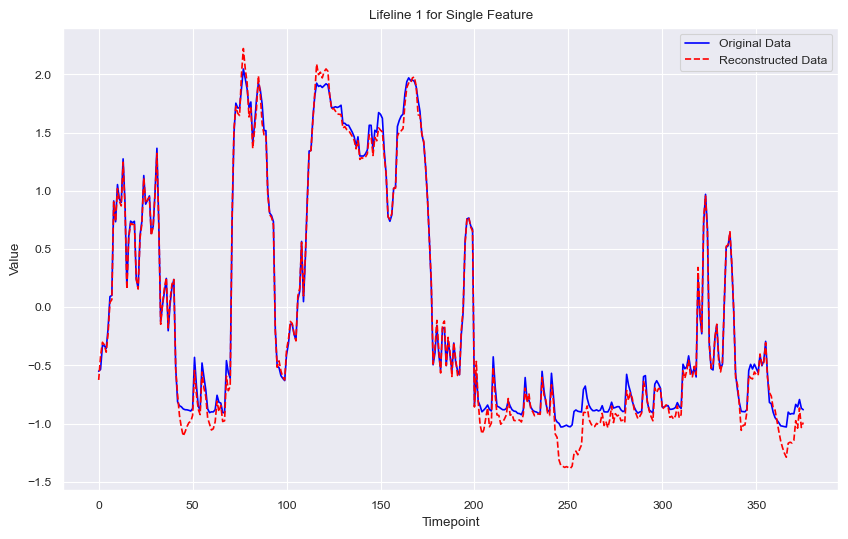

In [30]:
import matplotlib.pyplot as plt

# Assuming that one_lifeline is your data reshaped correctly for the model input
# Example: one_lifeline = np.random.rand(1, 376, 1)  # Use your actual reshaped data here

# Predict the reconstruction for the lifeline
reconstructed = model.predict(train_data)
lifeline = 5
feature = 6 

# Flatten the arrays to be able to plot them since they contain a single feature
scaled_series = train_data[lifeline,:,feature]
reconstructed_series = reconstructed[lifeline,:,feature]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(scaled_series, label='Original Data', color='blue')
plt.plot(reconstructed_series, label='Reconstructed Data', color='red', linestyle='--')
plt.title('Lifeline 1 for Single Feature')
plt.xlabel('Timepoint')
plt.ylabel('Value')
plt.legend()
plt.show()


In [33]:
model.save('autoencoder_model_100lifelines_378timesteps.h5')

c:\Users\elysi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
from tensorflow.keras.models import load_model

autoencoder = load_model('autoencoder_model_100lifelines_378timesteps.h5')

latent_space_model = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('lstm_98').output)
latent_representations = latent_space_model.predict(normalized_data)

# latent_space_representations now contains the latent vectors for each timestep
# Calculate the average latent vector across timesteps for each sample
average_latent_vectors = np.mean(latent_representations, axis=1)

# Save to CSV using pandas
import pandas as pd

# Convert to DataFrame
df = pd.DataFrame(average_latent_vectors)

# Save DataFrame to CSV
csv_file_path = 'latent_space_representations_100lifelines_378timesteps.csv'
df.to_csv(csv_file_path, index=False)


4/4 [==============================] - 3s 255ms/step


# Perturbation Analysis Zeroing out Latent Space

1/1 [==============================] - 0s 124ms/step


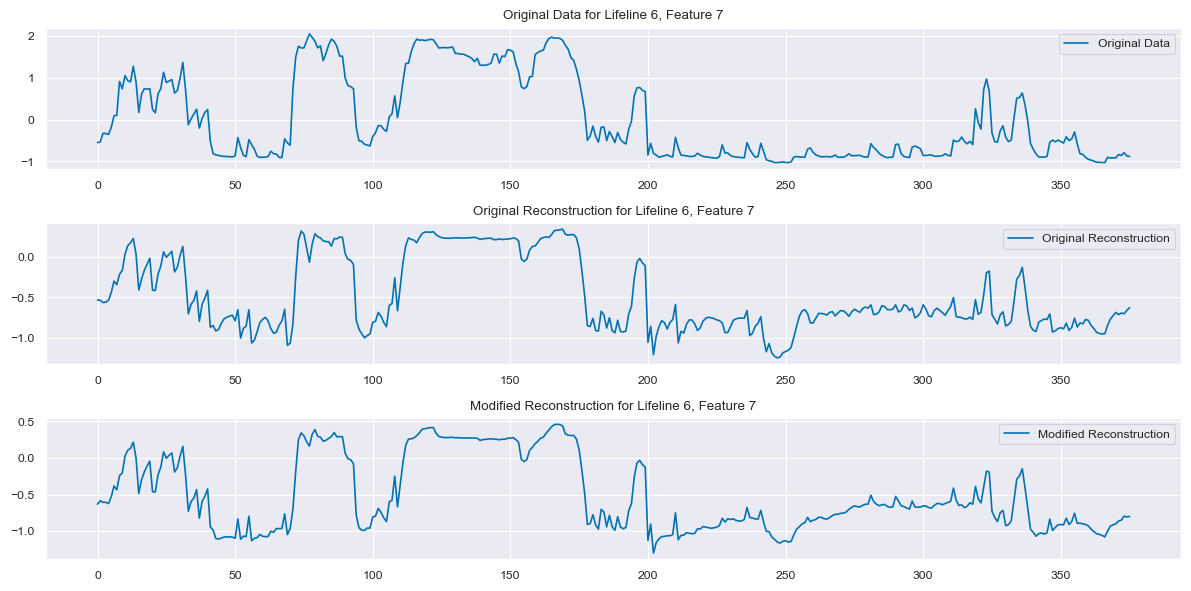

In [63]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input
from tensorflow.keras.initializers import glorot_uniform

# Load the autoencoder model
autoencoder = load_model('autoencoder_model_100lifelines_378timesteps.h5')

# Assuming normalized_data is shaped as (101, 376, 48)
# Assuming latent_representations are shaped as (101, 376, 10)

# Create a new input layer for the decoder model
decoder_input = Input(shape=(376, 10))  # This should match the shape of the encoder's output

# Rebuild the decoder assuming the last 3 layers are the decoder layers
x = decoder_input
for layer in autoencoder.layers[-3:]:  # Modify the range according to your decoder architecture
    x = layer(x)
decoder = Model(inputs=decoder_input, outputs=x)

# Select a specific lifeline to analyze
lifeline_index = 5  # Index for lifeline 6
feature_index = 6  # Index for feature 7

# Original latent space for the selected lifeline
original_latent_sample = latent_representations[lifeline_index]

# Predict the reconstruction for the original latent space
original_reconstruction = decoder.predict(np.expand_dims(original_latent_sample, axis=0))

# Modify the latent representation by zeroing out one neuron across all timesteps
modified_latent_sample = np.copy(original_latent_sample)
modified_latent_sample[:, 0] = 0  # Zero out the specific feature

# Predict the reconstruction for the modified latent space
modified_reconstruction = decoder.predict(np.expand_dims(modified_latent_sample, axis=0))

# Plotting the original data and the reconstructions
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot original data for the selected feature
plt.subplot(3, 1, 1)
plt.plot(normalized_data[lifeline_index, :, feature_index], label='Original Data')
plt.title(f'Original Data for Lifeline {lifeline_index+1}, Feature {feature_index+1}')
plt.legend()

# Plot reconstruction from original latent space for the selected feature
plt.subplot(3, 1, 2)
plt.plot(original_reconstruction[0, :, feature_index], label='Original Reconstruction')
plt.title(f'Original Reconstruction for Lifeline {lifeline_index+1}, Feature {feature_index+1}')
plt.legend()

# Plot reconstruction from modified latent space for the selected feature
plt.subplot(3, 1, 3)
plt.plot(modified_reconstruction[0, :, feature_index], label='Modified Reconstruction')
plt.title(f'Modified Reconstruction for Lifeline {lifeline_index+1}, Feature {feature_index+1}')
plt.legend()

plt.tight_layout()
plt.show()


In [65]:
# Given that the code execution environment does not have the user's custom files and model,
# I will demonstrate a code example that should work in the user's local environment.
# The code is intended to modify a latent sample by zeroing out each of the 10 neurons one by one,
# and plotting the original reconstruction, modified reconstruction, and the two overlaid.

# Note: This is a simulated example that cannot be executed here due to the absence of the user's data and model.

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input

# Load the autoencoder model
autoencoder = load_model('autoencoder_model_100lifelines_378timesteps.h5')

# Create a new input layer for the decoder model
decoder_input = Input(shape=(376, 10))  # This should match the shape of the encoder's output

# Rebuild the decoder assuming the last 3 layers are the decoder layers
x = decoder_input
for layer in autoencoder.layers[-3:]:  # Modify the range according to your decoder architecture
    x = layer(x)
decoder = Model(decoder_input, x)

# Select a specific lifeline to analyze
lifeline_index = 5  # Index for lifeline 6
feature_index = 6

# Original latent space for the selected lifeline
original_latent_sample = latent_representations[lifeline_index]

# Predict the reconstruction for the original latent space
original_reconstruction = decoder.predict(np.expand_dims(original_latent_sample, axis=0))

# Set up the plot
fig, axes = plt.subplots(10, 1, figsize=(12, 20))  # 10 subplots for each feature

# Loop over each feature, zero it out, predict, and plot
for i in range(10):
    # Copy the original latent sample and zero out the current feature across all timesteps
    modified_latent_sample = np.copy(original_latent_sample)
    modified_latent_sample[:, i] = 0

    # Predict the reconstruction for the modified latent sample
    modified_reconstruction = decoder.predict(np.expand_dims(modified_latent_sample, axis=0))

    # Plot the original and modified reconstructions
    axes[i].plot(original_reconstruction[0, :, feature_index], label='Original Reconstruction', color='blue', alpha=0.5)
    axes[i].plot(modified_reconstruction[0, :, feature_index], label='Modified Reconstruction', color='orange', alpha=0.5)
    axes[i].set_title(f'Feature {i}')
    axes[i].legend()

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 75ms/step


# Time Series Clustering - DTW

In [52]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.metrics import dtw
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming latent_representations is loaded and has the shape (101, 376, 10)
n_samples, n_timesteps, n_features = latent_representations.shape

# Scale time series data
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)

for feature_idx in range(n_features):
    feature_data = latent_representations[:, :, feature_idx].reshape(n_samples, n_timesteps, 1)
    feature_data_scaled = scaler.fit_transform(feature_data)

    silhouette_scores = []
    for n_clusters in range(5, 11):  # try with cluster numbers from 5 to 10
        model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=True, max_iter=10)
        y_pred = model.fit_predict(feature_data_scaled)
        silhouette_avg = silhouette_score(feature_data_scaled.reshape(n_samples, n_timesteps), y_pred)
        silhouette_scores.append(silhouette_avg)
        print(f"Silhouette Score for feature {feature_idx}, clusters {n_clusters}: {silhouette_avg}")

    # Find the number of clusters with the highest silhouette score
    best_n_clusters = np.argmax(silhouette_scores) + 5  # +5 because range starts from 5
    print(f"Best silhouette score for feature {feature_idx} is with {best_n_clusters} clusters")

    # Fit the model with the best number of clusters
    best_model = TimeSeriesKMeans(n_clusters=best_n_clusters, metric="dtw", verbose=True, max_iter=10)
    y_pred = best_model.fit_predict(feature_data_scaled)

    # Plotting centroid and comparing one sample from each cluster
    for i in range(best_n_clusters):
        plt.figure(figsize=(12, 4))

        # Plot the centroid
        centroid = best_model.cluster_centers_[i].flatten()
        plt.plot(centroid, "r-", label=f"Centroid {i+1}")

        # Plot one sample from the cluster
        cluster_members = feature_data_scaled[y_pred == i]
        if len(cluster_members) > 0:
            sample = cluster_members[0].flatten()
            plt.plot(sample, "k-", alpha=0.5, label=f"Sample from Cluster {i+1}")

        plt.legend()
        plt.title(f'Feature {feature_idx}, Cluster {i+1}')
        plt.tight_layout()

        # Save the plot with a unique name
        plt.savefig(f'feature_{feature_idx}_cluster_{i+1}_comparison.png')
        plt.close()  # Close the plot to avoid displaying it inline

    # Optionally, plot all time series in each cluster to compare within-cluster variance
    plt.figure(figsize=(12, 4 * best_n_clusters))
    for i in range(best_n_clusters):
        plt.subplot(best_n_clusters, 1, i + 1)

        # Plot all series in the cluster
        cluster_members = feature_data_scaled[y_pred == i]
        for series in cluster_members:
            plt.plot(series.flatten(), "k-", alpha=0.2)

        # Highlight the centroid
        plt.plot(centroid, "r-", label=f"Centroid {i+1}")
        plt.legend()
        plt.title(f'All Series in Feature {feature_idx}, Cluster {i+1}')

    plt.tight_layout()
    # Save the full comparison plot for the feature
    plt.savefig(f'feature_{feature_idx}_all_cluster_comparisons.png')
    plt.close()


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


65.275 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


42.042 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


41.141 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


40.928 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


40.816 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


40.816 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Silhouette Score for feature 0, clusters 5: -0.016413453299581247


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


58.515 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


39.618 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


38.591 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


38.522 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


38.522 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


Silhouette Score for feature 0, clusters 6: 0.006945430069969938


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


59.739 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


39.229 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


38.809 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


38.422 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


38.422 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.8s


Silhouette Score for feature 0, clusters 7: -0.0007678652346448657


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

55.235 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


37.772 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


37.076 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


37.076 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Silhouette Score for feature 0, clusters 8: -0.04047986173148802


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Do

52.572 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


36.059 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


35.913 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


35.913 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


Silhouette Score for feature 0, clusters 9: -0.0335773410269552


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

52.213 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


35.790 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


35.576 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


35.373 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


35.373 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


Silhouette Score for feature 0, clusters 10: -0.05262602885287784
Best silhouette score for feature 0 is with 6 clusters


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


55.720 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


39.207 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


38.728 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


38.728 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


80.913 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


53.978 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


52.354 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


52.225 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


52.121 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


52.015 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


52.015 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Silhouette Score for feature 1, clusters 5: 2.947131152582876e-05


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


79.152 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


52.090 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


51.104 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


50.839 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


50.839 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


Silhouette Score for feature 1, clusters 6: -0.031221690446579735


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


74.502 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


50.382 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


49.503 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


48.984 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


48.984 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


Silhouette Score for feature 1, clusters 7: -0.012369457285257991


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

71.036 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


48.922 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


48.670 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


48.365 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


48.035 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


48.035 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Silhouette Score for feature 1, clusters 8: -0.03272255150212497


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Do

69.708 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


48.198 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


47.676 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


47.676 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


Silhouette Score for feature 1, clusters 9: -0.04030908497558463


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

68.135 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.4s


45.822 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


45.452 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.3s


45.452 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.5s


Silhouette Score for feature 1, clusters 10: -0.041931196212069054
Best silhouette score for feature 1 is with 5 clusters


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.8s


80.896 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


54.413 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


53.717 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


53.288 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


53.288 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


90.793 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


71.253 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


70.866 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


70.666 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


70.233 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


69.801 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


69.801 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Silhouette Score for feature 2, clusters 5: -0.02114030553787193


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


88.083 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


67.331 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


66.879 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


66.623 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


66.623 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


Silhouette Score for feature 2, clusters 6: -0.0037066929140575117


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


92.235 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


66.813 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.8s


66.404 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


65.700 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


65.700 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.8s


Silhouette Score for feature 2, clusters 7: -0.013280215214302338


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

87.050 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


64.427 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.6s


63.774 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.5s


63.578 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.5s


63.578 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Silhouette Score for feature 2, clusters 8: -0.019549274037897066


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Do

81.695 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


62.784 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


62.290 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


62.290 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


Silhouette Score for feature 2, clusters 9: -0.02082831992552516


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

83.850 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


61.288 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


60.627 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


60.627 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


Silhouette Score for feature 2, clusters 10: -0.008953802401068047
Best silhouette score for feature 2 is with 6 clusters


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


90.177 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


68.144 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    1.0s


67.419 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.9s


66.999 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


66.999 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.8s


71.401 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


50.436 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


49.729 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


49.491 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


49.209 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


49.209 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Silhouette Score for feature 3, clusters 5: 0.0012521908254246143


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


71.523 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


48.187 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


46.857 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


46.708 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.8s


46.490 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


46.390 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.8s


46.390 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.8s


Silhouette Score for feature 3, clusters 6: 0.009738645233682501


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


68.057 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


48.405 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


47.076 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.8s


46.966 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


46.561 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.8s


46.561 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.8s


Silhouette Score for feature 3, clusters 7: -0.018620994558161963


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

65.465 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.4s


46.525 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.5s


45.923 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.4s


45.685 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.4s


45.524 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.4s


45.524 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Silhouette Score for feature 3, clusters 8: -0.023279883475399027


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Do

62.215 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


44.828 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.3s


44.828 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.4s


Silhouette Score for feature 3, clusters 9: -0.011591600004158336


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

61.817 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


43.126 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


42.955 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


42.955 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


Silhouette Score for feature 3, clusters 10: -0.02585284837830474
Best silhouette score for feature 3 is with 6 clusters


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


68.436 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    1.3s


48.893 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.8s


47.648 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


47.346 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.8s


47.346 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


119.016 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


64.543 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


63.241 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


62.711 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


62.711 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Silhouette Score for feature 4, clusters 5: 0.07748314855079667


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


101.091 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.8s


62.616 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.8s


61.322 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.9s


61.127 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.8s


61.127 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.9s


Silhouette Score for feature 4, clusters 6: 0.07148865898398783


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


92.286 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.8s


52.443 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.9s


51.791 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.8s


51.791 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    1.0s


Silhouette Score for feature 4, clusters 7: 0.0009501686500584005


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

97.545 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


60.673 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


58.810 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.3s


56.371 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.3s


56.218 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


55.395 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.3s


54.921 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


54.400 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


54.400 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Silhouette Score for feature 4, clusters 8: 0.03189442909765809


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Do

87.668 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


52.881 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


51.904 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


51.904 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


Silhouette Score for feature 4, clusters 9: 0.002631800520989917


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

81.218 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


51.055 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


49.960 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


49.960 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


Silhouette Score for feature 4, clusters 10: -0.030884519481417815
Best silhouette score for feature 4 is with 5 clusters


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


107.801 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


61.473 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


60.147 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


58.835 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


58.364 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


58.214 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


58.075 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


58.075 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


59.929 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


44.646 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


43.942 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


43.942 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


Silhouette Score for feature 5, clusters 5: -0.011693724342497864


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


55.688 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.8s


41.628 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


40.715 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


40.621 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.8s


40.582 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


40.582 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.9s


Silhouette Score for feature 5, clusters 6: -0.04167648743503314


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.9s


52.134 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.8s


40.746 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.9s


40.142 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    1.1s


39.717 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


39.471 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.8s


39.471 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    1.0s


Silhouette Score for feature 5, clusters 7: -0.03602223095606547


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

50.645 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.7s


39.613 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


39.079 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.3s


38.983 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.6s


38.874 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


38.874 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Silhouette Score for feature 5, clusters 8: -0.04259693885096988


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Do

50.127 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


39.026 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


38.019 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


37.948 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


37.948 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.4s


Silhouette Score for feature 5, clusters 9: -0.0442431256471532


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

49.255 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


37.116 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


36.471 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


36.471 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


Silhouette Score for feature 5, clusters 10: -0.08620440813252954
Best silhouette score for feature 5 is with 5 clusters


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


55.127 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


44.519 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


43.783 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


43.632 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


43.632 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


69.861 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


47.765 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


47.021 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


46.832 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


46.832 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Silhouette Score for feature 6, clusters 5: 0.0017047679498818542


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


65.397 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


46.571 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


44.707 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


44.239 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


43.979 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


43.817 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


43.817 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


Silhouette Score for feature 6, clusters 6: 0.01773110494142562


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


65.035 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


46.468 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


45.675 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


45.675 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


Silhouette Score for feature 6, clusters 7: -0.03848791742187191


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

59.835 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


42.509 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


42.509 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Silhouette Score for feature 6, clusters 8: -0.030731494155398463


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Do

59.941 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


42.295 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


41.513 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.0s


41.156 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.0s


41.156 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


Silhouette Score for feature 6, clusters 9: -0.02025487457053003


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

57.015 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.0s


40.414 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s


40.176 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


40.061 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


40.061 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


Silhouette Score for feature 6, clusters 10: -0.028687163792842335
Best silhouette score for feature 6 is with 6 clusters


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


61.798 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


45.759 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


44.780 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


44.140 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


44.081 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


44.036 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


44.036 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


59.313 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


43.034 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


42.260 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


42.092 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


42.092 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Silhouette Score for feature 7, clusters 5: -0.014685032883695397


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


55.986 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


40.281 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


40.281 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


Silhouette Score for feature 7, clusters 6: -0.02315448316734433


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


54.657 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


38.294 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


38.154 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


38.154 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


Silhouette Score for feature 7, clusters 7: -0.04461549111190873


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

52.877 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.0s


38.203 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.0s


37.396 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


37.297 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


37.297 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Silhouette Score for feature 7, clusters 8: -0.026941025683700673


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Do

53.604 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.0s


36.961 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.0s


36.813 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.0s


36.813 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.0s


Silhouette Score for feature 7, clusters 9: -0.04377018276838792


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

51.076 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.0s


36.858 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


36.858 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.0s


Silhouette Score for feature 7, clusters 10: -0.040874269753378115
Best silhouette score for feature 7 is with 5 clusters


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


57.098 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


41.816 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


41.255 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


41.052 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


41.052 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


104.224 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


61.616 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


58.926 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


58.572 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


58.572 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Silhouette Score for feature 8, clusters 5: 0.023286950585873795


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


95.935 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


62.150 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


56.611 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


55.346 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


55.346 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


Silhouette Score for feature 8, clusters 6: -0.006844525144207631


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


86.391 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


57.301 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


52.628 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


49.801 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


49.701 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


49.701 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


Silhouette Score for feature 8, clusters 7: 0.022026336861571523


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

82.729 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


54.702 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.0s


53.100 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.0s


53.068 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.0s


53.068 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Silhouette Score for feature 8, clusters 8: 0.008461875956201096


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Do

72.431 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.0s


47.276 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


45.460 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.0s


45.460 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


Silhouette Score for feature 8, clusters 9: -0.001952143271051798


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

67.020 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


44.037 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.0s


44.037 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


Silhouette Score for feature 8, clusters 10: -0.023758378722892166
Best silhouette score for feature 8 is with 5 clusters


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


97.779 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


63.063 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


59.715 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


58.834 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


58.703 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


58.703 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


62.861 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


44.769 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


43.140 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


42.759 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


42.693 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


42.693 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Silhouette Score for feature 9, clusters 5: -0.014523230079214836


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


63.737 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


44.035 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


43.476 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


43.290 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


43.166 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


43.040 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


43.040 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


Silhouette Score for feature 9, clusters 6: -0.0056750234392178986


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


59.988 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


42.543 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


41.396 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


41.125 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


40.991 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


40.925 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.9s


40.925 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.8s


Silhouette Score for feature 9, clusters 7: -0.012441390098411357


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

58.163 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


40.816 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


40.574 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


40.363 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.0s


40.363 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Silhouette Score for feature 9, clusters 8: -0.03134549762943038


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Do

57.317 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.3s


40.492 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


40.239 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


40.239 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


Silhouette Score for feature 9, clusters 9: -0.04726766577010293


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

55.816 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


38.580 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


37.942 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.0s


37.942 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.1s


Silhouette Score for feature 9, clusters 10: -0.04107373835323111
Best silhouette score for feature 9 is with 6 clusters


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


64.092 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


43.464 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


42.374 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


42.279 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


42.098 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


42.055 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


42.055 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


# Time Series Decomposition (Interpretability of Latent Space - Timesteps)

In [13]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Assuming latent_representations is loaded and has the shape (101, 376, 10)
n_samples, n_timesteps, n_features = latent_representations.shape
n_clusters = 6  # Fixed number of clusters

# Scale time series data
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)

for feature_idx in range(n_features):
    feature_data = latent_representations[:, :, feature_idx].reshape(n_samples, n_timesteps, 1)
    feature_data_scaled = scaler.fit_transform(feature_data)

    # Clustering with DTW and fixed n_clusters
    model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=True, max_iter=10)
    y_pred = model.fit_predict(feature_data_scaled)

    # Decompose each centroid and plot the components
    for i, centroid in enumerate(model.cluster_centers_):
        # Centroid is shaped as (1, n_timesteps, 1), so we squeeze it to (n_timesteps,)
        centroid_series = centroid.squeeze()

        # Decompose the centroid time series
        decomposition = sm.tsa.seasonal_decompose(centroid_series, model='additive', period=12)  # Adjust period based on your data's seasonality
        
        # Plotting the decomposition
        plt.figure(figsize=(12, 8))
        plt.subplot(411)
        plt.plot(decomposition.observed, label='Original')
        plt.legend(loc='best')
        plt.subplot(412)
        plt.plot(decomposition.trend, label='Trend')
        plt.legend(loc='best')
        plt.subplot(413)
        plt.plot(decomposition.seasonal,label='Seasonality')
        plt.legend(loc='best')
        plt.subplot(414)
        plt.plot(decomposition.resid, label='Residuals')
        plt.legend(loc='best')
        plt.tight_layout()
        
        # Save the decomposition plot for each centroid
        plt.savefig(f'feature_{feature_idx}_cluster_{i+1}_decomposition.png')
        plt.close()


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


61.521 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


40.824 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


39.908 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.8s


39.808 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


39.808 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Do

78.297 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


52.078 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


51.396 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


50.933 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


50.933 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Do

90.571 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


68.698 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


68.454 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.8s


68.221 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


68.221 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Do

71.519 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


49.258 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


48.475 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


47.895 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


46.875 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


46.752 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


46.752 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Do

98.135 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


59.605 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


56.781 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


56.041 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


55.991 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


55.991 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Do

56.242 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


41.678 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s


41.242 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


41.208 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


41.208 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Do

63.966 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


46.277 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


44.601 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


43.937 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


43.803 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


43.803 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Do

57.509 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


41.443 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


41.029 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


40.909 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


40.909 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Do

83.431 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


56.421 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


53.915 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


53.069 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


52.712 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


52.600 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


52.600 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Do

61.435 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


44.856 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


44.058 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


43.657 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


43.105 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


43.031 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s


42.906 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


42.906 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s


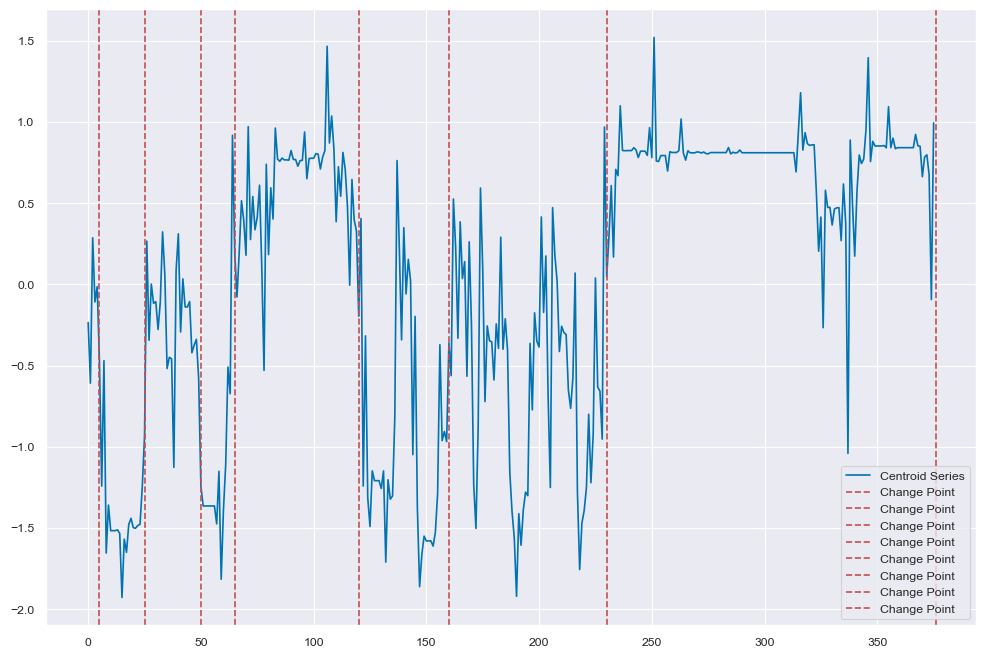

In [21]:
import ruptures as rpt

# Assuming you have your time series data in 'centroid_series'
n_bkps = 2  # number of breakpoints you want to detect

# Change point detection
algo = rpt.Pelt(model="rbf").fit(centroid_series)
result = algo.predict(pen=3)  # adjust the penalty value as needed

# Plotting the decomposition and change points
plt.figure(figsize=(12, 8))
plt.plot(centroid_series, label='Centroid Series')
for bkpt in result:
    plt.axvline(x=bkpt, color='r', linestyle='--', label='Change Point')
plt.legend()
plt.show()


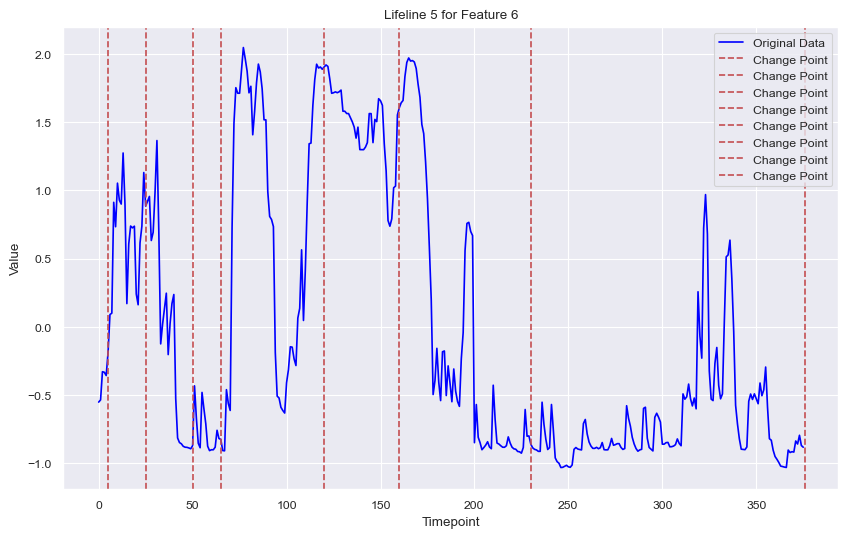

In [25]:
import ruptures as rpt
import matplotlib.pyplot as plt


lifeline = 5
feature = 6

# Extract the specific lifeline and feature series to be plotted
scaled_series = normalized_data[lifeline, :, feature]

# Plotting the original and reconstructed series
plt.figure(figsize=(10, 6))
plt.plot(scaled_series, label='Original Data', color='blue')

# Plotting the change points
for bkpt in result:
    plt.axvline(x=bkpt, color='r', linestyle='--', label='Change Point')

plt.title(f'Lifeline {lifeline} for Feature {feature}')
plt.xlabel('Timepoint')
plt.ylabel('Value')
plt.legend()
plt.show()


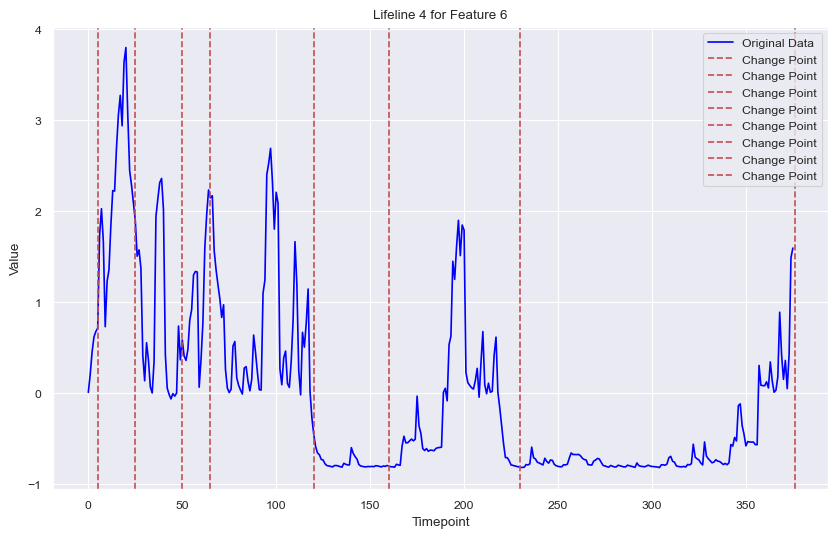

In [30]:
import ruptures as rpt
import matplotlib.pyplot as plt


lifeline = 4
feature = 6

# Extract the specific lifeline and feature series to be plotted
scaled_series = normalized_data[lifeline, :, feature]

# Plotting the original and reconstructed series
plt.figure(figsize=(10, 6))
plt.plot(scaled_series, label='Original Data', color='blue')

# Plotting the change points
for bkpt in result:
    plt.axvline(x=bkpt, color='r', linestyle='--', label='Change Point')

plt.title(f'Lifeline {lifeline} for Feature {feature}')
plt.xlabel('Timepoint')
plt.ylabel('Value')
plt.legend()
plt.show()


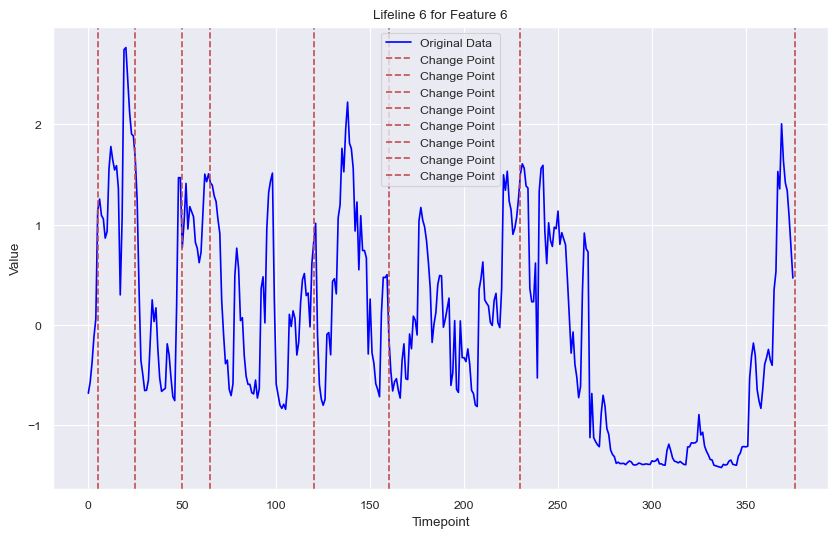

In [31]:
import ruptures as rpt
import matplotlib.pyplot as plt


lifeline = 6
feature = 6

# Extract the specific lifeline and feature series to be plotted
scaled_series = normalized_data[lifeline, :, feature]

# Plotting the original and reconstructed series
plt.figure(figsize=(10, 6))
plt.plot(scaled_series, label='Original Data', color='blue')

# Plotting the change points
for bkpt in result:
    plt.axvline(x=bkpt, color='r', linestyle='--', label='Change Point')

plt.title(f'Lifeline {lifeline} for Feature {feature}')
plt.xlabel('Timepoint')
plt.ylabel('Value')
plt.legend()
plt.show()


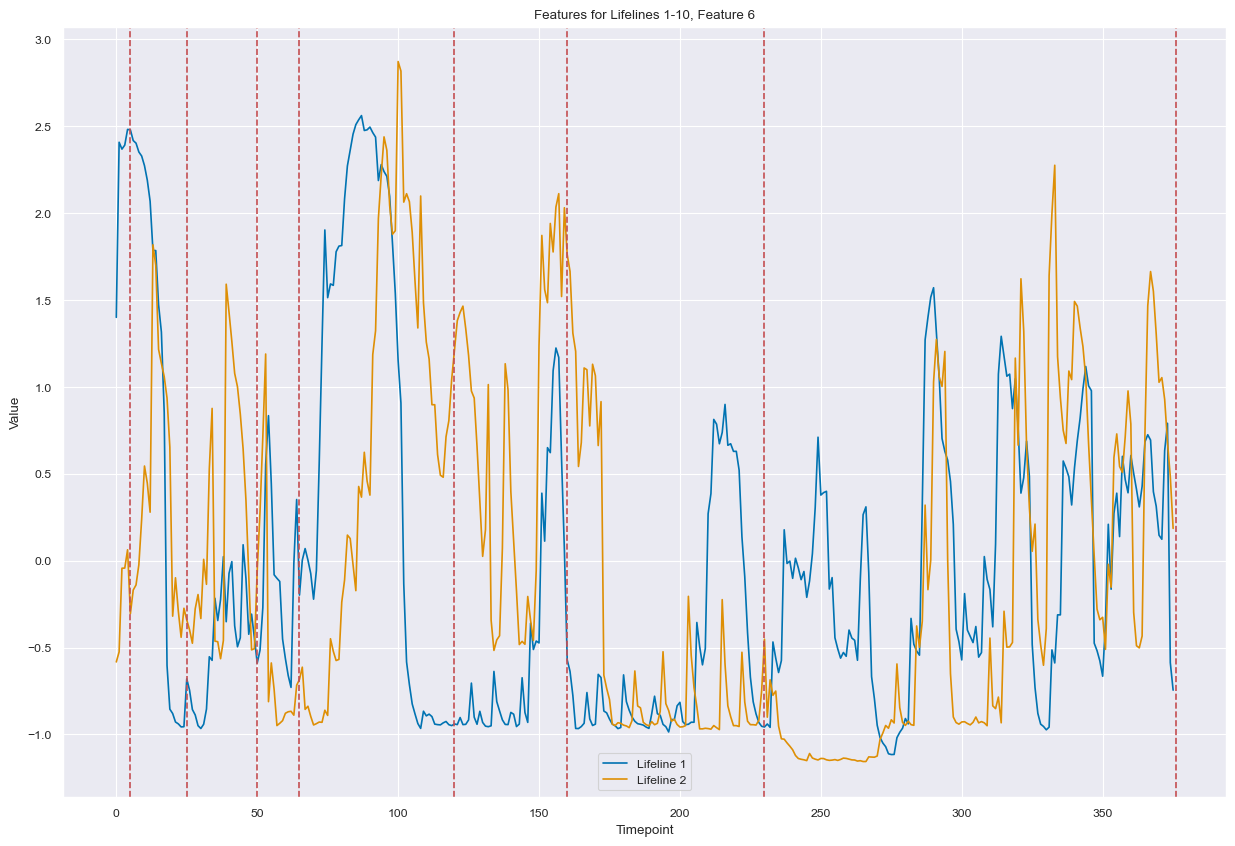

In [29]:
# Initialize the plot
plt.figure(figsize=(15, 10))

# Plotting the original series for lifelines 1-10, with change points
for lifeline in range(1, 3):
    # Extract the specific lifeline and feature series to be plotted
    scaled_series = normalized_data[lifeline, :, feature]
    # Plot the series
    plt.plot(scaled_series, label=f'Lifeline {lifeline}')

# Plotting the change points
for bkpt in result:
    plt.axvline(x=bkpt, color='r', linestyle='--')

# Set title and labels
plt.title(f'Features for Lifelines 1-10, Feature {feature}')
plt.xlabel('Timepoint')
plt.ylabel('Value')

# Create a legend
plt.legend()
plt.show()

c:\Users\elysi\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\elysi\AppData\Local\Temp\ipykernel_22800\3134900793.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(umap_results[:, 0], umap_results[:, 1], s=5, cmap='Spectral')


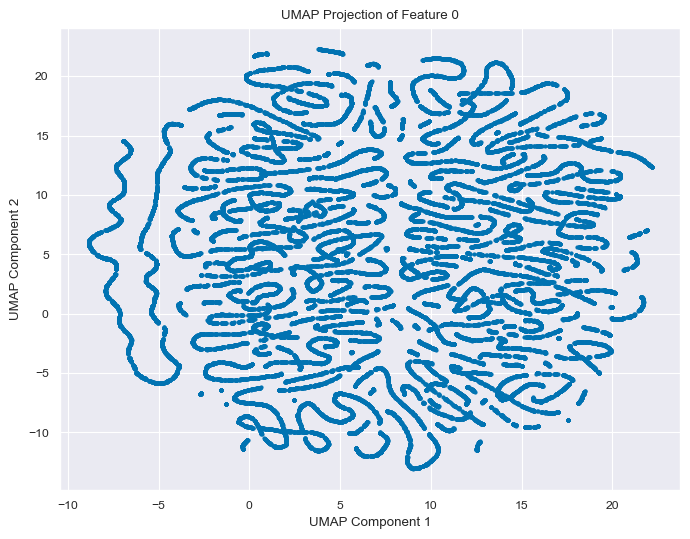

c:\Users\elysi\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\elysi\AppData\Local\Temp\ipykernel_22800\3134900793.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(umap_results[:, 0], umap_results[:, 1], s=5, cmap='Spectral')


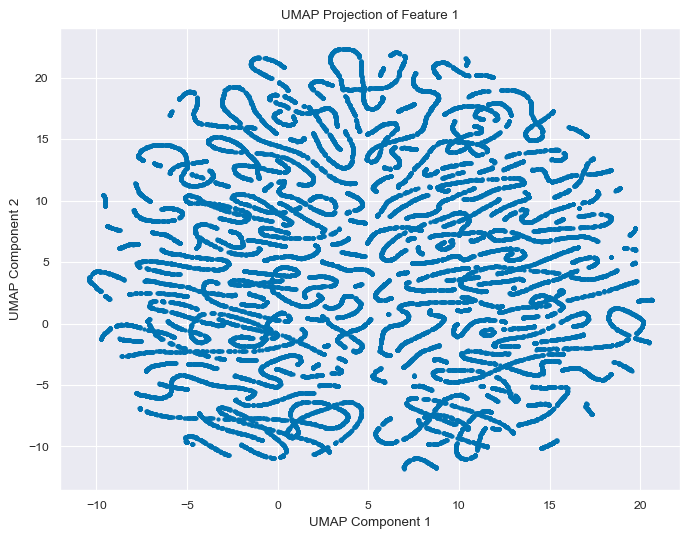

c:\Users\elysi\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\elysi\AppData\Local\Temp\ipykernel_22800\3134900793.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(umap_results[:, 0], umap_results[:, 1], s=5, cmap='Spectral')


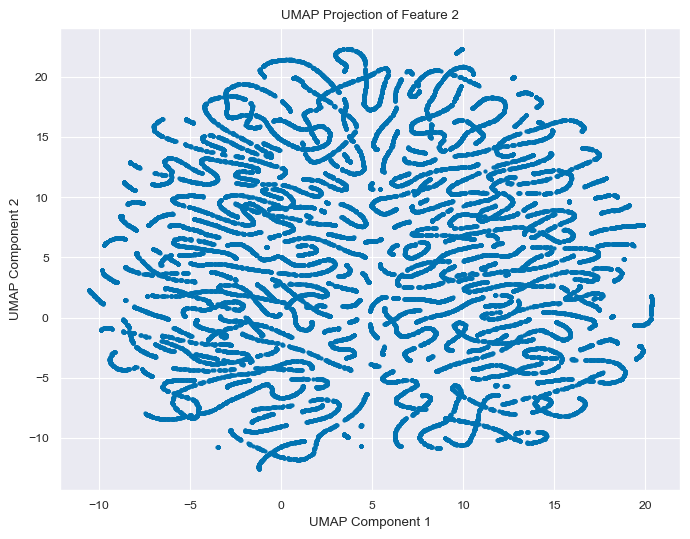

c:\Users\elysi\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\elysi\AppData\Local\Temp\ipykernel_22800\3134900793.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(umap_results[:, 0], umap_results[:, 1], s=5, cmap='Spectral')


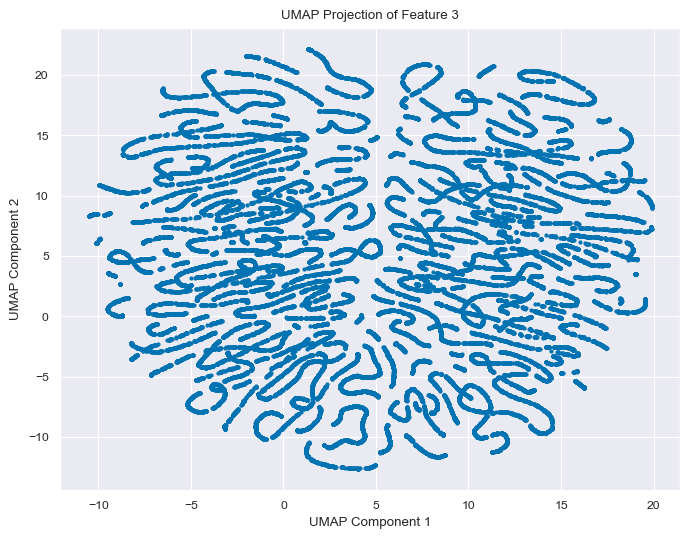

c:\Users\elysi\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\elysi\AppData\Local\Temp\ipykernel_22800\3134900793.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(umap_results[:, 0], umap_results[:, 1], s=5, cmap='Spectral')


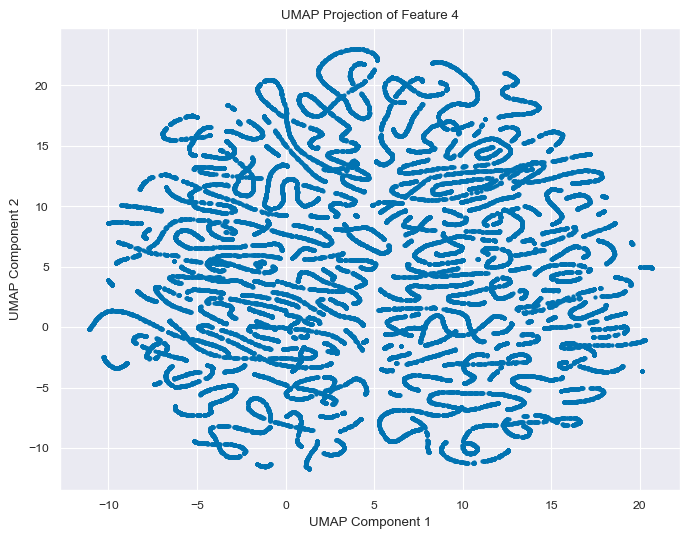

c:\Users\elysi\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\elysi\AppData\Local\Temp\ipykernel_22800\3134900793.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(umap_results[:, 0], umap_results[:, 1], s=5, cmap='Spectral')


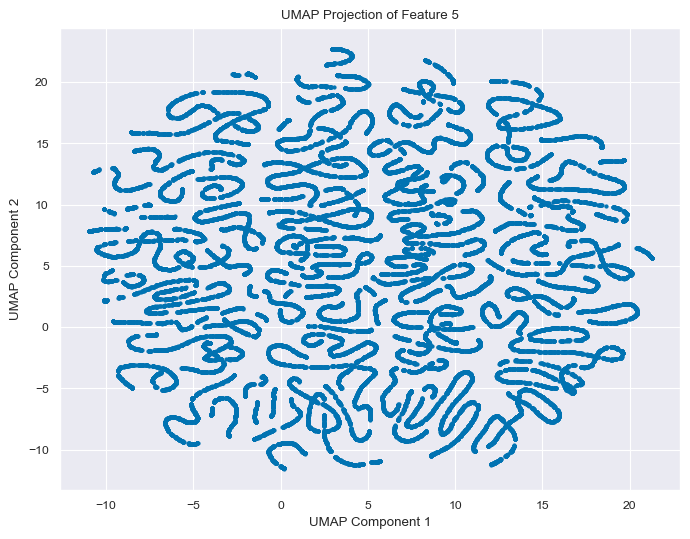

c:\Users\elysi\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\elysi\AppData\Local\Temp\ipykernel_22800\3134900793.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(umap_results[:, 0], umap_results[:, 1], s=5, cmap='Spectral')


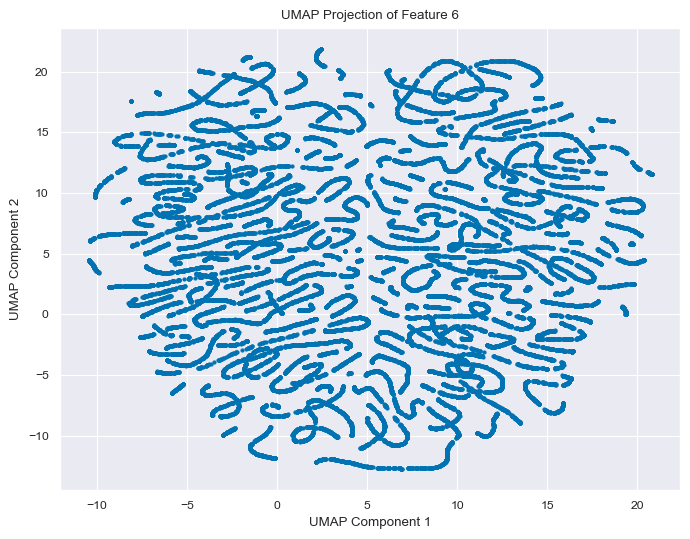

c:\Users\elysi\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


KeyboardInterrupt: 

In [16]:
from umap import UMAP
import matplotlib.pyplot as plt
import numpy as np

# Latent_representations with shape (101, 376, 10)

for feature_idx in range(latent_representations.shape[2]):
    # Extract the current feature across all samples and timesteps
    feature_data = latent_representations[:, :, feature_idx]
    
    # Reshape the data for UMAP (from 3D to 2D where each row is a timestep across all samples)
    # Now, each "observation" is a single timestep of a single feature across all samples
    umap_data = feature_data.reshape(-1, 1)

    # Apply UMAP
    umap = UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
    umap_results = umap.fit_transform(umap_data)
    
    # Plot the UMAP results
    plt.figure(figsize=(8, 6))
    plt.scatter(umap_results[:, 0], umap_results[:, 1], s=5, cmap='Spectral')
    plt.title(f'UMAP Projection of Feature {feature_idx}')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.show()


# VAEs

In [3]:
import os
import pandas as pd
import numpy as np

folder_path = '100_dFBA_Lifelines'
file_names = sorted(os.listdir(folder_path))

expected_timepoints = 376 # reduced timepoints by 10 for faster runs, just temporary 

for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    lifeline_df = pd.read_csv(file_path, sep="\t", index_col=0)

    # Select every 10th row and ensure there are exactly 376 timepoints
    reduced_df = lifeline_df.iloc[::10][:expected_timepoints]
    reduced_df.to_csv(file_path, sep="\t")

data_list = []
filtered_reactions = None

for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    lifeline_df = pd.read_csv(file_path, sep="\t", index_col=0)

    if filtered_reactions is None:
        non_constant_fluxes_df = lifeline_df.loc[:, (lifeline_df != lifeline_df.iloc[0]).any()]
        unique_reactions_fluxes_df = non_constant_fluxes_df.loc[:, ~non_constant_fluxes_df.columns.duplicated()]
        filtered_reactions = unique_reactions_fluxes_df.columns

    filtered_lifeline_df = lifeline_df[filtered_reactions]

    if filtered_lifeline_df.shape != (expected_timepoints, len(filtered_reactions)):
        print(f"Shape mismatch for file: {file_name}. Expected ({expected_timepoints}, {len(filtered_reactions)}) but got {filtered_lifeline_df.shape}")

    data_list.append(filtered_lifeline_df.to_numpy())

data_3d = np.stack(data_list, axis=1)
print("Shape of the Big Matrix:", data_3d.shape)


C:\Users\elysi\AppData\Local\Temp\ipykernel_34704\597854438.py:15: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  reduced_df = lifeline_df.iloc[::10][:expected_timepoints]
C:\Users\elysi\AppData\Local\Temp\ipykernel_34704\597854438.py:15: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  reduced_df = lifeline_df.iloc[::10][:expected_timepoints]
C:\Users\elysi\AppData\Local\Temp\ipykernel_34704\597854438.py:15: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  reduced_df = lifeline_df.iloc[::10][:expected_t

Shape of the Big Matrix: (376, 101, 48)


In [4]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming data_3d is original data with shape (n_timesteps, n_samples, n_features)
# Example: n_timesteps = 376, n_samples = 14, n_features = 48

n_timesteps, n_samples, n_features = data_3d.shape

# Initialize a StandardScaler for each feature for each sample
scalers = [[StandardScaler() for _ in range(n_features)] for _ in range(n_samples)]

# Normalized data will have the same shape as data_3d initially
normalized_data = np.empty_like(data_3d, dtype=float)

# Apply the scalers to each feature for each sample across all timesteps
for sample_index in range(n_samples):
    for feature_index in range(n_features):
        # Extract the feature data for the current sample
        feature_data = data_3d[:, sample_index, feature_index].reshape(-1, 1)
        
        # Fit and transform the data using the corresponding scaler
        normalized_feature_data = scalers[sample_index][feature_index].fit_transform(feature_data)
        
        # Assign the normalized data back to its position in the normalized_data array
        normalized_data[:, sample_index, feature_index] = normalized_feature_data.flatten()

# Transpose normalized_data to have the shape (n_samples, n_timesteps, n_features)
normalized_data = np.transpose(normalized_data, (1, 0, 2))

In [6]:
normalized_data.shape

(101, 376, 48)

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Lambda, RepeatVector, TimeDistributed
from tensorflow.keras.initializers import glorot_uniform, he_normal
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

def build_vae(input_shape, latent_dim=5):
    # Encoder
    inputs = Input(shape=input_shape, name='encoder_input')
    x = LSTM(150, activation='tanh', return_sequences=True, kernel_initializer=glorot_uniform(seed=0))(inputs)
    x = LSTM(70, activation='tanh', return_sequences=False, kernel_initializer=glorot_uniform(seed=0))(x)
    z_mean = Dense(latent_dim, name='z_mean')(x)
    z_log_var = Dense(latent_dim, name='z_log_var')(x)
    z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

    # Decoder
    latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
    x = RepeatVector(input_shape[0])(latent_inputs)  # Ensure the decoder's output matches encoder input shape
    x = LSTM(70, activation='tanh', return_sequences=True)(x)
    x = LSTM(150, activation='tanh', return_sequences=True)(x)
    outputs = TimeDistributed(Dense(input_shape[1]))(x)

    # Instantiate encoder, decoder, VAE models
    encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
    decoder = Model(latent_inputs, outputs, name='decoder')
    vae_outputs = decoder(encoder(inputs)[2])
    vae = Model(inputs, vae_outputs, name='vae_lstm')

    # Define VAE loss
    reconstruction_loss = tf.reduce_mean(tf.keras.losses.mean_squared_error(K.flatten(inputs), K.flatten(vae_outputs)))
    kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
    kl_loss = K.sum(kl_loss, axis=-1) * -0.5
    vae_loss = K.mean(reconstruction_loss + kl_loss)

    vae.add_loss(vae_loss)
    vae.compile(optimizer='adam')

    return encoder, decoder, vae



input_shape = (normalized_data.shape[1], normalized_data.shape[2])

encoder, decoder, vae = build_vae(input_shape, latent_dim=10)
vae.summary()



Model: "vae_lstm"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder_input (InputLayer)  [(None, 376, 48)]            0         []                            
                                                                                                  
 encoder (Functional)        [(None, 10),                 182700    ['encoder_input[0][0]']       
                              (None, 10),                                                         
                              (None, 10)]                                                         
                                                                                                  
 decoder (Functional)        (None, 376, 48)              162528    ['encoder[0][2]']             
                                                                                           

In [8]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed
from tensorflow.keras.callbacks import Callback
import tensorflow.keras.backend as K

class LRFinder(Callback):
    def __init__(self, base_lr, max_lr, steps):
        super(LRFinder, self).__init__()
        self.base_lr = base_lr
        self.max_lr = max_lr
        self.steps = steps
        self.lr_increment = (self.max_lr - self.base_lr) / self.steps
        self.lrs = []
        self.losses = []

    def on_batch_end(self, batch, logs=None):
        lr = self.base_lr + batch * self.lr_increment
        self.lrs.append(lr)
        self.losses.append(logs['loss'])
        K.set_value(self.model.optimizer.lr, lr)


def run_lr_finder(normalized_data, base_lr, max_lr, step_size):
    # Use the first sample shape as input_shape, assuming all samples have the same shape
    input_shape = (normalized_data.shape[1], normalized_data.shape[2])
    _, _, vae_model = build_vae(input_shape)  # Extract only the VAE model
    lr_finder = LRFinder(base_lr=base_lr, max_lr=max_lr, steps=step_size)
    
    # Use the normalized_data directly
    vae_model.fit(normalized_data, normalized_data, epochs=1, batch_size=32, callbacks=[lr_finder], verbose=0)
    
    return lr_finder.lrs, lr_finder.losses


# Assume normalized_data is already loaded and shaped as (samples, timesteps, features)
# Example shape, replace with your actual normalized_data shape
normalized_data_shape = (101, 38, 48)

learning_rate_ranges = [(1e-5, 1e-3), (1e-4, 1e-2), (1e-3, 1e-1), (1e-1, 8e-1)]
step_size = 100

for i, (base_lr, max_lr) in enumerate(learning_rate_ranges):
    lrs, losses = run_lr_finder(normalized_data, base_lr, max_lr, step_size)
    print(f"Learning Rate Test {i+1}: LR range {base_lr} to {max_lr}")
    print("Learning Rates:", lrs)
    print("Losses:", losses)
    print("-------")


Learning Rate Test 1: LR range 1e-05 to 0.001
Learning Rates: [1e-05, 1.9900000000000003e-05, 2.98e-05, 3.97e-05]
Losses: [1.225088357925415, 1.1400666236877441, 1.1122878789901733, 1.1017320156097412]
-------
Learning Rate Test 2: LR range 0.0001 to 0.01
Learning Rates: [0.0001, 0.000199, 0.00029800000000000003, 0.000397]
Losses: [1.19523286819458, 1.1403300762176514, 1.1228266954421997, 1.1070921421051025]
-------
Learning Rate Test 3: LR range 0.001 to 0.1
Learning Rates: [0.001, 0.00199, 0.00298, 0.00397]
Losses: [1.1403732299804688, 1.1232281923294067, 1.1081985235214233, 1.092962622642517]
-------
Learning Rate Test 4: LR range 0.1 to 0.8
Learning Rates: [0.1, 0.10700000000000001, 0.114, 0.12100000000000001]
Losses: [1.3474161624908447, 1.2278599739074707, 3.3160600662231445, 3.3555867671966553]
-------


In [9]:
import numpy as np
import tensorflow as tf

class OneCycleLRScheduler(tf.keras.callbacks.Callback):
    def __init__(self, max_lr, total_steps, div_factor=10, increase_fraction=0.3):
        super(OneCycleLRScheduler, self).__init__()
        self.max_lr = max_lr  # Maximum learning rate (upper bound)
        self.total_steps = total_steps  # Total steps in the cycle
        self.div_factor = div_factor  # Determines the lower bound of learning rate
        self.increase_fraction = increase_fraction  # Fraction of steps to increase the learning rate
        self.higher_lr = self.max_lr
        self.lower_lr = self.max_lr / self.div_factor
        self.step_size_up = self.total_steps * self.increase_fraction
        self.step_size_down = self.total_steps - self.step_size_up
        
    def on_train_batch_begin(self, batch, logs=None):
        progress = batch / self.total_steps
        if progress <= self.increase_fraction:
            # Increase phase
            lr = self.lower_lr + (self.higher_lr - self.lower_lr) * (progress / self.increase_fraction)
        else:
            # Decrease phase
            progress -= self.increase_fraction
            lr = self.higher_lr - (self.higher_lr - self.lower_lr) * (progress / (1 - self.increase_fraction))
        tf.keras.backend.set_value(self.model.optimizer.lr, lr)


In [11]:
from sklearn.model_selection import train_test_split

epochs = 1000  # Number of epochs to train
batch_size = 32  # Batch size

# Split the data while keeping the lifeline structure
train_data, test_data = train_test_split(normalized_data, test_size=0.2, random_state=42)

# Calculate the number of steps per epoch
steps_per_epoch = len(train_data) // batch_size
total_steps = epochs * steps_per_epoch

input_shape = (normalized_data.shape[1], normalized_data.shape[2])

_, _, vae = build_vae(input_shape, latent_dim=10)  

vae.compile(optimizer=Adam(), loss='mse') 

one_cycle_lr = OneCycleLRScheduler(max_lr=0.107, total_steps=total_steps, div_factor=10, increase_fraction=0.3)

# Train the model using the training data and validate on the test data
vae.fit(train_data, train_data, 
        validation_data=(test_data, test_data),
        epochs=epochs, 
        batch_size=batch_size, 
        callbacks=[one_cycle_lr])

# Evaluate the model on test data to see the test error
test_loss = vae.evaluate(test_data, test_data)
print(f'Test Loss: {test_loss}')


Epoch 1/1000
3/3 [==============================] - 40s 10s/step - loss: 3.1968 - val_loss: 2.5761
Epoch 2/1000
3/3 [==============================] - 28s 8s/step - loss: 2.3172 - val_loss: 2.0711
Epoch 3/1000
3/3 [==============================] - 28s 8s/step - loss: 2.0552 - val_loss: 2.0186
Epoch 4/1000
3/3 [==============================] - 27s 8s/step - loss: 2.0168 - val_loss: 1.9947
Epoch 5/1000
3/3 [==============================] - 27s 8s/step - loss: 2.1300 - val_loss: 2.0179
Epoch 6/1000
3/3 [==============================] - 27s 8s/step - loss: 2.0151 - val_loss: 2.0052
Epoch 7/1000
3/3 [==============================] - 28s 8s/step - loss: 2.0058 - val_loss: 2.0008
Epoch 8/1000
3/3 [==============================] - 28s 8s/step - loss: 2.0021 - val_loss: 1.9980
Epoch 9/1000
3/3 [==============================] - 28s 8s/step - loss: 2.0000 - val_loss: 1.9950
Epoch 10/1000
3/3 [==============================] - 28s 8s/step - loss: 1.9970 - val_loss: 1.9930
Epoch 11/1000
3/3 

3/3 [==============================] - 5s 869ms/step


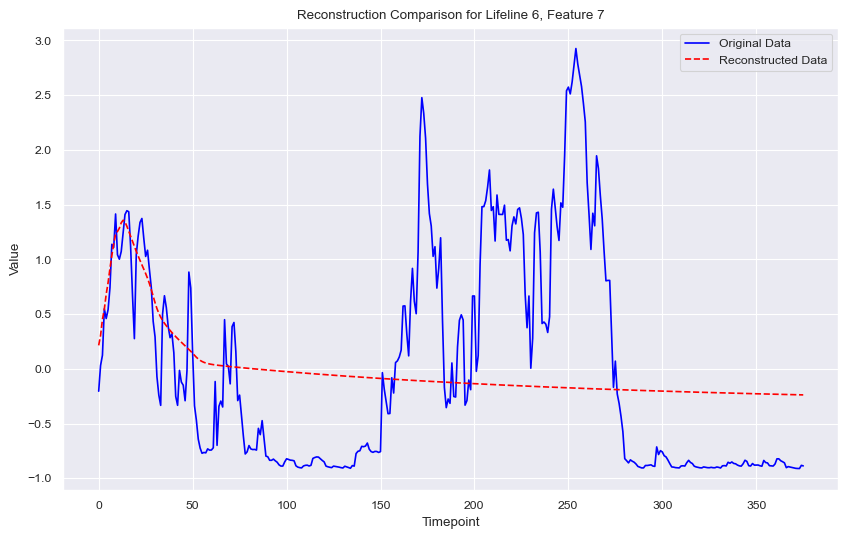

In [12]:
import matplotlib.pyplot as plt
import numpy as np

model = vae  # Use the VAE model for predictions

# Predict the reconstruction for the lifeline
reconstructed = model.predict(train_data)
lifeline_index = 5  # Assuming you want to plot the reconstruction for the 6th lifeline
feature_index = 6  # Assuming you're interested in the 7th feature

# Assuming train_data is shaped (num_samples, num_timesteps, num_features) and you want to plot specific lifeline and feature
original_series = train_data[lifeline_index, :, feature_index]
reconstructed_series = reconstructed[lifeline_index, :, feature_index]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(original_series, label='Original Data', color='blue')
plt.plot(reconstructed_series, label='Reconstructed Data', color='red', linestyle='--')
plt.title(f'Reconstruction Comparison for Lifeline {lifeline_index + 1}, Feature {feature_index + 1}')
plt.xlabel('Timepoint')
plt.ylabel('Value')
plt.legend()
plt.show()
